# Table of Contents

[0. Context](#context)<br>

[1. Import the Dataset and Explore the Data](#import-the-dataset-and-explore-the-data)<br>
Check data contents, provide descriptive statistics, and check for incoherencies in the data.<br>
Explore data visually and extract relevant insights.<br>
Explain your rationale and findings.<br>
Do not forget to analyze multivariate relationships.<br>
&nbsp;&nbsp;&nbsp;&nbsp;[1.1 Importing Libraries](#11-importing-libraries)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[1.2 Loading and Reading the Dataset](#12-loading-and-reading-the-dataset)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[1.3 Descriptive Statistics](#13-descriptive-statistics)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[1.4 Incoherencies](#14-incoherencies)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[1.5 Exploring Data Visually](#15-exploring-data-visually)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[1.6 Pair-wise Relationships](#16-pair-wise-relationships)<br>

[2. Clean and Pre-process the Data](#clean-and-pre-process-the-data)<br>
Are there any missing values? Take action to handle them.<br>
Check the dataset for outliers and pre-process them. Justify your decisions.<br>
Deal with categorical variables.<br>
Review current features and create extra features if needed. Explain your steps.<br>
Perform data scaling. Explain the reasoning behind your choices.<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.1 Missing Values](#21-missing-values)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.2 Duplicates](#22-duplicates)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.3 Outliers](#23-outliers)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.4 Categorical Data](#24-categorical-data)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.5 Aggregations](#25-aggregations)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.6 Feature Engineering](#26-feature-engineering)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.7 Multivariate Relationships](#27-multivariate-relationships)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.8 Data Scaling](#28-data-scaling)<br>

[3. Feature Selection](#feature-selection)<br>
Define and implement an unambiguous strategy for feature selection.<br>
Use methods discussed in the course.<br>
Present and justify your final selection.<br>
&nbsp;&nbsp;&nbsp;&nbsp;[3.1 Filter Methods](#31-filter-methods)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.1.1 Univariate Variables](#311-univariate-variables)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.1.2 Correlation Indices](#312-correlation-indices)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.1.3 Chi-Square](#313-chi-square)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[3.2 Wrapper Methods](#32-wrapper-methods)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;

# 0. Context <a name="0-context"></a>

The New York Workers’ Compensation Board (WCB) administers and regulates workers’ compensation, disability, and other workers’ benefits. <br>
**WCB is responsible for assembling and deciding on claims whenever it becomes aware of a workplace injury**. Since 2000, the WCB has assembled and reviewed more than 5 million claims. However, manually reviewing all claims is an arduous and time-consuming process. For that reason, the WCB has reached out to Nova IMS to assist them in the creation of a model that can automate the decision-making whenever a new claim is received. <br>

Our task is to **create a classification model that can accurately predict the WCB’s final decision on what type o 
injury (Claim Injury Type) should be given to a caim.l To do that, the
WCB has provided labelled data with all claims assembled between
2020 and 2022 <br>

# Import the Dataset and Explore the Data <a name="import-the-dataset-and-explore-the-data"></a>

## 1.1 Importing Libraries <a name="11-importing-libraries"></a>

In [6]:
# Remember: library imports are ALWAYS at the top of the script, no exceptions!
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from kmodes.kmodes import KModes
from math import ceil
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split


# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Seeting seaborn style
sns.set()

In [7]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil
from imblearn.over_sampling import SMOTE, SVMSMOTE
from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif, RFE, mutual_info_classif
from sklearn.linear_model import LassoCV, SGDClassifier, LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, roc_auc_score, precision_score, recall_score, make_scorer
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB, ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, HistGradientBoostingClassifier, StackingClassifier, VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.utils import class_weight
from openpyxl import load_workbook

## 1.2 Loading and Reading the Dataset <a name="12-loading-and-reading-the-dataset"></a>

In [9]:
wcb = pd.read_csv('train_data.csv', sep = ',', low_memory=False)   #sep is good to seperate data
pd.set_option('display.max_columns', None) #to be able too see all columns
wcb.head(5)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,5393875,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaN,M,NaN,44.0,RETAIL TRADE,I,NaN,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,5393091,4. TEMPORARY,WYOMING,N,ROCHESTER,2020-02-21,F,4.0,23.0,CONSTRUCTION,I,NaN,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,5393889,4. TEMPORARY,ORANGE,N,ALBANY,NaN,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,957648180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,2A. SIF,5393887,2. NON-COMP,DUTCHESS,N,ALBANY,NaN,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,NaN,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0


In [10]:
test_wcb = pd.read_csv('test_data.csv', sep = ',', low_memory=False)   #sep is good to seperate data
pd.set_option('display.max_columns', None) #to be able too see all columns

In [11]:
wcb = wcb.dropna(subset=['Claim Injury Type']) # antes de fazer isto mostrar que há valores nulos aqui
# importante fazer uma exploração dos dados antes disto e tirar conclusões, inclusive que há linhas com os valores todos nulos


In [12]:
X = wcb.drop("Claim Injury Type", axis = 1)
y = wcb["Claim Injury Type"]

In [13]:
from sklearn.model_selection import train_test_split


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state = 0, stratify = y,
                                                  shuffle = True)



In [14]:
train_copy = X_train.copy()

### Metadata

**Claim Dates**  
`Accident Date` Injury date of the claim.  
`Assembly Date` The date the claim was first assembled.  
`C-2 Date` Date of receipt of the Employer's Report of Work-Related Injury/Illness or equivalent (formerly Form C-2).  
`C-3 Date` Date Form C-3 (Employee Claim Form) was received.  
`First Hearing Date` Date the first hearing was held on a claim at a WCB hearing location. A blank date means the claim has not yet had a hearing held.  

**Worker Demographics**  
`Age at Injury` Age of injured worker when the injury occurred.  
`Birth Year` The reported year of birth of the injured worker.  
`Gender` The reported gender of the injured worker.  
`Zip Code` The reported ZIP code of the injured worker’s home address.  

**Claim and Case Information**  
`Alternative Dispute Resolution` Adjudication processes external to the Board.  
`Attorney/Representative` Is the claim being represented by an Attorney?  
`Claim Identifier` Unique identifier for each claim, assigned by WCB.  
`Carrier Name` Name of primary insurance provider responsible for providing workers’ compensation coverage to the injured worker’s employer.  
`Carrier Type` Type of primary insurance provider responsible for providing workers’ compensation coverage.  
`Average Weekly Wage` The wage used to calculate workers’ compensation, disability, or paid leave wage replacement benefits.  

**Location and Region**  
`County of Injury` Name of the New York County where the injury occurred.  
`District Name` Name of the WCB district office that oversees claims for that region or area of the state.  
`Medical Fee Region` Approximate region where the injured worker would receive medical service.  

**Incident and Injury Details**  
`COVID-19 Indicator` Indication that the claim may be associated with COVID-19.  
`IME-4 Count` Number of IME-4 forms received per claim. The IME-4 form is the “Independent Examiner's Report of Independent Medical Examination” form.  

**Industry Classification**  
`Industry Code` NAICS code and descriptions are available at https://www.naics.com/search-naics-codes-by-industry/.  
`Industry Code Description` 2-digit NAICS industry code description used to classify businesses according to their economic activity.  

**Injury Descriptions and Codes**  
`OIICS Nature of Injury Description` The OIICS nature of injury codes & descriptions are available at https://www.bls.gov/iif/oiics_manual_2007.pdf.  
`WCIO Cause of Injury Code` The WCIO cause of injury codes & descriptions are available at https://www.wcio.org/Active%20PNC/WCIO_Cause_Table.pdf.  
`WCIO Cause of Injury Description` See description of field above.  
`WCIO Nature of Injury Code` The WCIO nature of injury codes are available at https://www.wcio.org/Active%20PNC/WCIO_Nature_Table.pdf.  
`WCIO Nature of Injury Description` See description of field above.  
`WCIO Part Of Body Code` The WCIO part of body codes & descriptions are available at https://www.wcio.org/Active%20PNC/WCIO_Part_Table.pdf.  
`WCIO Part Of Body Description` See description of field above.  

**Claim Outcomes**  
`Agreement Reached` Binary variable: Yes if there is an agreement without the involvement of the WCB; otherwise unknown at the start of a claim.  
`WCB Decision` Multiclass variable: Decision of the WCB relative to the claim; "Accident" indicates a workplace accident, and "Occupational Disease" indicates illness from the workplace, both of which require WCB deliberation and may be unknown at the claim's start.  
`Claim Injury Type` Main target variable: Deliberation of the WCB relative to benefits awarded to the claim, with numbering indicating severity.  
aim, with numbering indicating severity. <br>  

## 1.3 Descriptive Statistics <a name="13-descriptive-statistics"></a>

#### Shape

In [18]:
wcb.shape

(574026, 33)

In [19]:
wcb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 574026 entries, 0 to 593467
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       574026 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier               

### Any footnotes?

In [21]:
wcb.tail(5)
# No, there isn't any

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
593451,2022-12-14,35.0,N,2022-12-30,N,0.00,1987.0,2022-12-30,NaN,STATE INSURANCE FUND,2A. SIF,6165265,2. NON-COMP,BRONX,N,NYC,NaN,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,IV,NaN,45.0,COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE,10.0,CONTUSION,42.0,LOWER BACK AREA,10467,0.0,Not Work Related,4.0
593455,2022-12-15,33.0,N,2022-12-31,N,0.00,1989.0,2022-12-31,NaN,WESCO INSURANCE CO,1A. PRIVATE,6165285,2. NON-COMP,NASSAU,N,NYC,NaN,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,NaN,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",37.0,INFLAMMATION,35.0,HAND,11590,0.0,Not Work Related,6.0
593456,2022-12-13,61.0,N,2022-12-31,N,991.08,1961.0,2022-12-31,NaN,SECURITY NATIONAL INSURANCE CO,1A. PRIVATE,6165506,4. TEMPORARY,ERIE,N,BUFFALO,NaN,F,1.0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,NaN,98.0,"CUMULATIVE, NOC",80.0,"ALL OTHER CUMULATIVE INJURY, NOC",34.0,WRIST,14227,0.0,Not Work Related,3.0
593457,2022-12-14,24.0,N,2022-12-31,N,0.00,1998.0,2022-12-31,NaN,TECHNOLOGY INSURANCE CO. INC.,1A. PRIVATE,6165339,2. NON-COMP,NEW YORK,N,NYC,NaN,F,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,NaN,59.0,USING TOOL OR MACHINERY,59.0,"ALL OTHER SPECIFIC INJURIES, NOC",55.0,ANKLE,10029,0.0,Not Work Related,5.0
593467,2022-12-13,72.0,N,2022-12-31,N,0.00,1950.0,2022-12-31,NaN,TECHNOLOGY INSURANCE CO. INC.,1A. PRIVATE,6165075,2. NON-COMP,SULLIVAN,N,BINGHAMTON,NaN,F,NaN,48.0,TRANSPORTATION AND WAREHOUSING,I,NaN,25.0,FROM DIFFERENT LEVEL (ELEVATION),90.0,MULTIPLE PHYSICAL INJURIES ONLY,-9.0,MULTIPLE,12779,0.0,Not Work Related,3.0


In [22]:
wcb.describe(include='object').T

,count,unique,top,freq
Accident Date,570337,5539,2020-03-01,1245
Alternative Dispute Resolution,574026,3,N,571412
Assembly Date,574026,897,2020-03-06,1413
Attorney/Representative,574026,2,N,392291
C-2 Date,559466,2475,2021-05-11,1847
C-3 Date,187245,1648,2021-04-21,350
Carrier Name,574026,2046,STATE INSURANCE FUND,111144
Carrier Type,574026,8,1A. PRIVATE,285368
Claim Injury Type,574026,8,2. NON-COMP,291078
County of Injury,574026,63,SUFFOLK,60430


In [23]:
wcb.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
Age at Injury,574026.0,4.211427e+01,14.256432,0.0,31.00,42.0,54.00,117.0
Average Weekly Wage,545375.0,4.910883e+02,6092.918120,0.0,0.00,0.0,841.00,2828079.0
Birth Year,544948.0,1.886768e+03,414.644423,0.0,1965.00,1977.0,1989.00,2018.0
Claim Identifier,574026.0,5.778956e+06,222308.226013,5393066.0,5586764.25,5778282.5,5971328.75,6165685.0
IME-4 Count,132803.0,3.207337e+00,2.832303,1.0,1.00,2.0,4.00,73.0
Industry Code,564068.0,5.864531e+01,19.644175,11.0,45.00,61.0,71.00,92.0
OIICS Nature of Injury Description,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WCIO Cause of Injury Code,558386.0,5.438114e+01,25.874281,1.0,31.00,56.0,75.00,99.0
WCIO Nature of Injury Code,558369.0,4.101384e+01,22.207521,1.0,16.00,49.0,52.00,91.0
WCIO Part Of Body Code,556944.0,3.973815e+01,22.365940,-9.0,33.00,38.0,53.00,99.0


## 1.4 Incoherencies <a name="14-incoherencies"></a>

In [25]:
wcb.dtypes

Accident Date                          object
Age at Injury                         float64
Alternative Dispute Resolution         object
Assembly Date                          object
Attorney/Representative                object
Average Weekly Wage                   float64
Birth Year                            float64
C-2 Date                               object
C-3 Date                               object
Carrier Name                           object
Carrier Type                           object
Claim Identifier                        int64
Claim Injury Type                      object
County of Injury                       object
COVID-19 Indicator                     object
District Name                          object
First Hearing Date                     object
Gender                                 object
IME-4 Count                           float64
Industry Code                         float64
Industry Code Description              object
Medical Fee Region                

### Datatypes:

**Numerical Data: <br>
float -> int** <br>
`Age at Injury` <br>
`Birth Year` <br>
`IME-4 Count`  <br>
`Number of Dependents` <br>
`WCIO Cause of Injury Code` <br>
`WCIO Nature of Injury Code` <br>
`WCIO Part Of Body Code` <br>
`Industry Code` <br>


**Object -> Dates** <br>
`C-2 Date` <br>
`C-3 Date` <br>
`First Hearing Date` <br>
`Accident Date`  <br>
`Assembly Dates` <br>

### Change in datatypes

**Numeric data from float to integer:**

In [29]:
wcb_float_to_int = ['Age at Injury', 'Birth Year', 'IME-4 Count', 'Number of Dependents', 'WCIO Cause of Injury Code',
                    'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Industry Code']

for col in wcb_float_to_int:
    # Convert the column to numeric, then to Int64 (nullable integer type)
    X_train[col] = pd.to_numeric(X_train[col], errors='coerce').astype('Int64')
    X_val[col] = pd.to_numeric(X_val[col], errors='coerce').astype('Int64')
    

**Dates from object to datetime format:**

In [31]:
# Convert dates treated as objects to datetime format
X_train['C-2 Date'] = pd.to_datetime(X_train['C-2 Date'], errors='coerce')
X_train['C-3 Date'] = pd.to_datetime(X_train['C-3 Date'], errors='coerce')
X_train['Accident Date'] = pd.to_datetime(X_train['Accident Date'], errors='coerce')
X_train['First Hearing Date'] = pd.to_datetime(X_train['First Hearing Date'], errors='coerce')
X_train['Assembly Date'] = pd.to_datetime(X_train['Assembly Date'], errors='coerce')

In [32]:
# Convert dates treated as objects to datetime format
X_val['C-2 Date'] = pd.to_datetime(X_val['C-2 Date'], errors='coerce')
X_val['C-3 Date'] = pd.to_datetime(X_val['C-3 Date'], errors='coerce')
X_val['Accident Date'] = pd.to_datetime(X_val['Accident Date'], errors='coerce')
X_val['First Hearing Date'] = pd.to_datetime(X_val['First Hearing Date'], errors='coerce')
X_val['Assembly Date'] = pd.to_datetime(X_val['Assembly Date'], errors='coerce')

In [33]:
X_train['Gender'] = X_train['Gender'].replace('U', np.nan)

In [34]:
X_val['Gender'] = X_val['Gender'].replace('U', np.nan)

In [35]:
wcb.dtypes

Accident Date                          object
Age at Injury                         float64
Alternative Dispute Resolution         object
Assembly Date                          object
Attorney/Representative                object
Average Weekly Wage                   float64
Birth Year                            float64
C-2 Date                               object
C-3 Date                               object
Carrier Name                           object
Carrier Type                           object
Claim Identifier                        int64
Claim Injury Type                      object
County of Injury                       object
COVID-19 Indicator                     object
District Name                          object
First Hearing Date                     object
Gender                                 object
IME-4 Count                           float64
Industry Code                         float64
Industry Code Description              object
Medical Fee Region                

# CLAIM IDENTIFIER REPEATS ONE VALUE

## 1.5 Exploring Data Visually <a name="15-exploring-data-visually"></a>

### Numerical Data Visualization

In [39]:
# Supondo que o dataset X_train já está carregado no ambiente de trabalho
# Identifica colunas categóricas
categorical_columns = X_train.select_dtypes(include='number').columns

# Calcula a variância das frequências para cada coluna categórica
variance_results = {}

for col in categorical_columns:
    frequencies = X_train[col].value_counts()  # Conta a frequência de cada categoria
    variance_results[col] = frequencies.var()  # Calcula a variância das frequências

# Converte o dicionário de resultados para um DataFrame para visualização
variance_df = pd.DataFrame(variance_results.items(), columns=["Variable", "Variance"])

# Mostra o resultado
print(variance_df)


                              Variable      Variance
0                        Age at Injury  2.115428e+07
1                  Average Weekly Wage  6.998150e+05
2                           Birth Year  1.983714e+07
3                     Claim Identifier  0.000000e+00
4                          IME-4 Count  4.722882e+07
5                        Industry Code  4.918768e+08
6   OIICS Nature of Injury Description           NaN
7            WCIO Cause of Injury Code  6.074639e+07
8           WCIO Nature of Injury Code  4.527598e+08
9               WCIO Part Of Body Code  1.011876e+08
10                   Agreement Reached  8.662537e+10
11                Number of Dependents  1.313675e+05


Since the variable `Claim Identifier` doesn't have any variance we think it won't the helpful for the development of the model, therefore we think it should be dropped.

### Categorical Data Visualization

In [42]:

# Supondo que o dataset X_train já está carregado no ambiente de trabalho
# Identifica colunas categóricas
categorical_columns = X_train.select_dtypes(include='object').columns

# Calcula a variância das frequências para cada coluna categórica
variance_results = {}

for col in categorical_columns:
    frequencies = X_train[col].value_counts()  # Conta a frequência de cada categoria
    variance_results[col] = frequencies.var()  # Calcula a variância das frequências

# Converte o dicionário de resultados para um DataFrame para visualização
variance_df = pd.DataFrame(variance_results.items(), columns=["Variable", "Variance"])

# Mostra o resultado
print(variance_df)


                             Variable      Variance
0      Alternative Dispute Resolution  6.934985e+10
1             Attorney/Representative  1.412880e+10
2                        Carrier Name  4.776580e+06
3                        Carrier Type  6.427908e+09
4                    County of Injury  1.329086e+08
5                  COVID-19 Indicator  8.626113e+10
6                       District Name  4.522430e+09
7                              Gender  1.892003e+10
8           Industry Code Description  6.320544e+08
9                  Medical Fee Region  5.538969e+09
10   WCIO Cause of Injury Description  6.524764e+07
11  WCIO Nature of Injury Description  4.527598e+08
12      WCIO Part Of Body Description  1.053242e+08
13                           Zip Code  4.128280e+04
14                       WCB Decision           NaN


Since the variable `WCB Decision` doesn't have any variance we think it won't the helpful for the development of the model, therefore we think it should be dropped.

## 1.6 Pair-wise Relationships <a name="16-pair-wise-relationships"></a>

# 2. Clean and Pre-process the Data <a name="2-clean-and-pre-process-the-data"></a>

WCB has provided labelled data with all claims assembled between 2020 and 2022

In [47]:
wcb.shape

(574026, 33)

## 2.1 Missing Values <a name="21-missing-values"></a>

`Step 1` **Disposable rows and columns**

Check for % non-null values for each feature:

In [51]:
# Calculate the non-null percentage and null counts
non_null_percentage = X_train.notna().mean() * 100
null_counts = X_train.isna().sum()

# Convert to a DataFrame for better display
non_null_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Non-Null Percentage': non_null_percentage.values,
    'Null Values': null_counts.values,})

# Sort the DataFrame by Non-Null Percentage
non_null_df.sort_values('Non-Null Percentage', ascending=False)

,Variable,Non-Null Percentage,Null Values
31,Number of Dependents,100.000000,0
14,District Name,100.000000,0
2,Alternative Dispute Resolution,100.000000,0
3,Assembly Date,100.000000,0
4,Attorney/Representative,100.000000,0
30,WCB Decision,100.000000,0
29,Agreement Reached,100.000000,0
20,Medical Fee Region,100.000000,0
1,Age at Injury,100.000000,0
9,Carrier Name,100.000000,0


**Drop column with all null values:**

In [53]:
X_train.drop(columns=['OIICS Nature of Injury Description'], inplace=True)

In [54]:
X_val.drop(columns=['OIICS Nature of Injury Description'], inplace=True)

Check how many rows with missing values there are throughout all dataset columns: <br>
*Excluding 'Assembly Date' and 'Claim Identifier', which have values for every row but aren't relevant enough to keep if all others are NaN*

In [56]:
# Exclude columns 'Assembly Date' and 'Claim Identifier'
nan_columns = X_train.columns.drop(['Assembly Date', 'Claim Identifier'])

# Count how many rows have all NaN values in the selected columns
((X_train[nan_columns].isnull()) | (X_train[nan_columns] == 0)).all(axis=1).sum()


# não está a dropar nada porque tive de retirar em cima no split


0

In [57]:
'''# Exclude columns 'Assembly Date' and 'Claim Identifier'
nan_columns = X_train.columns.drop(['Assembly Date', 'Claim Identifier'])

# Identificar as linhas que devem ser dropadas (todas NaN ou 0 nas colunas selecionadas)
rows_to_drop = X_train[((X_train[nan_columns].isnull()) | (X_train[nan_columns] == 0)).all(axis=1)].index

# Remover essas linhas de X_train
X_train = X_train.drop(rows_to_drop)

# Remover as mesmas linhas de y_train
y_train = y_train.drop(rows_to_drop)

# (Opcional) Resetar os índices, se necessário
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
'''

# como não está a dropar nenhuma não é preciso este código

"# Exclude columns 'Assembly Date' and 'Claim Identifier'\nnan_columns = X_train.columns.drop(['Assembly Date', 'Claim Identifier'])\n\n# Identificar as linhas que devem ser dropadas (todas NaN ou 0 nas colunas selecionadas)\nrows_to_drop = X_train[((X_train[nan_columns].isnull()) | (X_train[nan_columns] == 0)).all(axis=1)].index\n\n# Remover essas linhas de X_train\nX_train = X_train.drop(rows_to_drop)\n\n# Remover as mesmas linhas de y_train\ny_train = y_train.drop(rows_to_drop)\n\n# (Opcional) Resetar os índices, se necessário\nX_train = X_train.reset_index(drop=True)\ny_train = y_train.reset_index(drop=True)\n"

**Drop rows with all NaN values, identified in previous step for the selected columns (all but 2):**

In [59]:
X_train = X_train.dropna(subset = nan_columns, how = 'all')

In [60]:
X_train.shape
# Calculate the non-null percentage and null counts
non_null_percentage = X_train.notna().mean() * 100
null_counts = X_train.isna().sum()

# Convert to a DataFrame for better display
non_null_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Non-Null Percentage': non_null_percentage.values,
    'Null Values': null_counts.values,})

# Sort the DataFrame by Non-Null Percentage
non_null_df.sort_values('Non-Null Percentage', ascending=False)

,Variable,Non-Null Percentage,Null Values
30,Number of Dependents,100.000000,0
14,District Name,100.000000,0
2,Alternative Dispute Resolution,100.000000,0
3,Assembly Date,100.000000,0
4,Attorney/Representative,100.000000,0
29,WCB Decision,100.000000,0
28,Agreement Reached,100.000000,0
20,Medical Fee Region,100.000000,0
1,Age at Injury,100.000000,0
9,Carrier Name,100.000000,0


In [61]:
wcb.shape

(574026, 33)

In summary: <br>
We **treated missing values for a total of 15 features** with this operation.

**Columns to drop** = 1, `OIICS Nature of Injury Description` <br>
**Rows to drop in total** = 19445 <br>

By removing all null rows (except for `Assembly Date` and `Claim Identifier`) all the null values of the target variable `Claim Injury Type` are also removed, not needing another step to delete them.

**Turn 'C-3 Date' into a binary outcome feature, where 0  "no form received" and 1 = "at least 1 form received"**

In [64]:
X_train['C-3 Date'] = X_train['C-3 Date'].apply(lambda x: 0 if pd.isna(x) else 1)

In [65]:
X_val['C-3 Date'] = X_val['C-3 Date'].apply(lambda x: 0 if pd.isna(x) else 1)

**Turn 'First Hearing Date' into a binary outcome feature, where 0 = "there was no hearing" and 1 = "there was a hearing"**

In [67]:
X_train['First Hearing Date'] = X_train['First Hearing Date'].apply(lambda x: 0 if pd.isna(x) else 1)

In [68]:
X_val['First Hearing Date'] = X_val['First Hearing Date'].apply(lambda x: 0 if pd.isna(x) else 1)

**Change in 'IME-4 Count' null values**

Since `IME-4 Count` has only integers different from 0, we are assuming that all null values mean that an independent medical evaluation wasn't requested, therefore all null values will be changed to 0's.

In [71]:
X_train['IME-4 Count'] = X_train['IME-4 Count'].fillna(0)
X_train['IME-4 Count'].value_counts()
X_train['IME-4 Count'].quantile(0.5)

0.0

In [72]:
X_val['IME-4 Count'] = X_val['IME-4 Count'].fillna(0)

In [73]:
# Calculate the non-null percentage and null counts
non_null_percentage = X_train.notna().mean() * 100
null_counts = X_train.isna().sum()

# Convert to a DataFrame for better display
non_null_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Non-Null Percentage': non_null_percentage.values,
    'Null Values': null_counts.values,})

# Sort the DataFrame by Non-Null Percentage
non_null_df.sort_values('Non-Null Percentage', ascending=False)

,Variable,Non-Null Percentage,Null Values
15,First Hearing Date,100.000000,0
11,Claim Identifier,100.000000,0
29,WCB Decision,100.000000,0
28,Agreement Reached,100.000000,0
20,Medical Fee Region,100.000000,0
17,IME-4 Count,100.000000,0
1,Age at Injury,100.000000,0
14,District Name,100.000000,0
13,COVID-19 Indicator,100.000000,0
12,County of Injury,100.000000,0


In [74]:
X = (X_train['Assembly Date'] - X_train['Accident Date']).dt.days
X.describe()

count    456271.000000
mean         82.390408
std         603.319475
min       -1127.000000
25%           5.000000
50%          10.000000
75%          25.000000
max       21503.000000
dtype: float64

In [75]:
X_train['Accident Date'] = X_train.apply(lambda x: x['Assembly Date'] - pd.Timedelta(days=10) if pd.isna(x['Accident Date']) else x['Accident Date'], axis=1)

In [76]:
X_val['Accident Date'] = X_val.apply(lambda x: x['Assembly Date'] - pd.Timedelta(days=10) if pd.isna(x['Accident Date']) else x['Accident Date'], axis=1)

In [77]:
X_train['Accident Date'].describe()

count                           459220
mean     2021-04-28 19:48:06.867296768
min                1961-09-06 00:00:00
25%                2020-09-14 00:00:00
50%                2021-06-26 00:00:00
75%                2022-03-21 00:00:00
max                2023-09-29 00:00:00
Name: Accident Date, dtype: object

**Most of the `Birth Year` values can be calculated by subtracting `Accident Date` with `Age at Injury`, since `Accident Date` still has some null values**

In [79]:
X_train['Birth Year'] = X_train['Birth Year'].fillna(X_train['Accident Date'].dt.year - X_train['Age at Injury'])

In [80]:
X_val['Birth Year'] = X_val['Birth Year'].fillna(X_val['Accident Date'].dt.year - X_val['Age at Injury'])

In [81]:
X_train['Birth Year'].describe()

count       459220.0
mean     1891.643273
std         404.0123
min              0.0
25%           1965.0
50%           1977.0
75%           1989.0
max           2022.0
Name: Birth Year, dtype: Float64

**Since the median value of `Average Weekly Wage` is 0, and more than half of the values of this variable are also 0, we think that replacing null values with the median is the most correct approach** <br>
In this case, the mean is a reasonable value considering the real world conditions, however the values range from 0 to 2.8 milion, reducing the credibility of the mean

In [83]:
Y = (X_train['Assembly Date'] - X_train['C-2 Date']).dt.days
Y.describe()

count    447597.000000
mean          3.978968
std         260.624504
min       -1395.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        9614.000000
dtype: float64

In [84]:
X_train['Average Weekly Wage'] = X_train['Average Weekly Wage'].fillna(0)

In [85]:
X_val['Average Weekly Wage'] = X_val['Average Weekly Wage'].fillna(0)

**Since the median value of the diference between `Assembly Date` and `C-2 Date` is 0 days and the mean is 4 days, we believe that the best approach is to fill the null values of the `C-2 Date` equal to the values in `Assembly Date`** <br>
We choose `Assembly Date` to replace the null values because these two variables have high correlation between them (we show this foward in the code)

In [87]:
Z = (X_train['Assembly Date'] - X_train['Accident Date']).dt.days
Z.describe()

count    459220.000000
mean         81.925535
std         601.406964
min       -1127.000000
25%           5.000000
50%          10.000000
75%          24.000000
max       21503.000000
dtype: float64

In [88]:
X_train['C-2 Date'] = X_train.apply(lambda x: x['Assembly Date'] if pd.isna(x['C-2 Date']) else x['C-2 Date'], axis=1)

In [89]:
X_val['C-2 Date'] = X_val.apply(lambda x: x['Assembly Date'] if pd.isna(x['C-2 Date']) else x['C-2 Date'], axis=1)

# REVER SE QUEREMOS DAR DROP A ISTO TUDO

In [91]:
# Remover linhas de X_train com base nas colunas especificadas
X_train = X_train.dropna(subset=['WCIO Part Of Body Description'])
X_train = X_train.dropna(subset=['WCIO Cause of Injury Description'])
X_train = X_train.dropna(subset=['WCIO Nature of Injury Description'])
X_train = X_train.dropna(subset=['Industry Code'])

# Garantir que os índices de y_train fiquem alinhados com os de X_train
y_train = y_train.loc[X_train.index]


In [92]:
# Remover linhas de X_val com base nas colunas especificadas
X_val = X_val.dropna(subset=['WCIO Part Of Body Description'])
X_val = X_val.dropna(subset=['WCIO Cause of Injury Description'])
X_val = X_val.dropna(subset=['WCIO Nature of Injury Description'])
X_val = X_val.dropna(subset=['Industry Code'])

# Garantir que os índices de y_train fiquem alinhados com os de X_val
y_val = y_val.loc[X_val.index]


In [93]:
X_train.shape

(444027, 31)

In [94]:
y_train.shape

(444027,)

**Transform the variable `Gender` into numeric where 0 is Male, 1 is Female and 2 is Non-Binary, with the handling of the null values with the mode, which is male in this case**

In [96]:
X_train['Gender'] = X_train['Gender'].fillna(0)

X_train['Gender'] = X_train['Gender'].replace({'M': 0, 'F': 1, 'X': 2}).astype('Int64')

In [97]:
X_val['Gender'] = X_val['Gender'].fillna(0)

X_val['Gender'] = X_val['Gender'].replace({'M': 0, 'F': 1, 'X': 2}).astype('Int64')

In [98]:
X_train['Zip Code'] = X_train['Zip Code'].fillna('Unknown')

In [99]:
# Calculate the non-null percentage and null counts
non_null_percentage = X_train.notna().mean() * 100
null_counts = X_train.isna().sum()

# Convert to a DataFrame for better display
non_null_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Non-Null Percentage': non_null_percentage.values,
    'Null Values': null_counts.values,})

# Sort the DataFrame by Non-Null Percentage
non_null_df.sort_values('Non-Null Percentage', ascending=False)    

,Variable,Non-Null Percentage,Null Values
0,Accident Date,100.0,0
16,Gender,100.0,0
29,WCB Decision,100.0,0
28,Agreement Reached,100.0,0
27,Zip Code,100.0,0
26,WCIO Part Of Body Description,100.0,0
25,WCIO Part Of Body Code,100.0,0
24,WCIO Nature of Injury Description,100.0,0
23,WCIO Nature of Injury Code,100.0,0
22,WCIO Cause of Injury Description,100.0,0


In [100]:
wcb.shape

(574026, 33)

In [101]:
X_train['Carrier Type'] = X_train['Carrier Type'].replace({
    '1A. PRIVATE': 1,
    '2A. SIF': 2,
    '3A. SELF PUBLIC': 3,
    '4A. SELF PRIVATE': 4,
    '5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)': 5,
    '5C. SPECIAL FUND - POI CARRIER WCB MENANDS': 5,
    '5D. SPECIAL FUND - UNKNOWN': 5,
    'UNKNOWN': 0
}).astype('Int64')
X_train['Carrier Type'].value_counts()

Carrier Type
1    222974
3     94842
2     87022
4     38399
5       520
0       270
Name: count, dtype: Int64

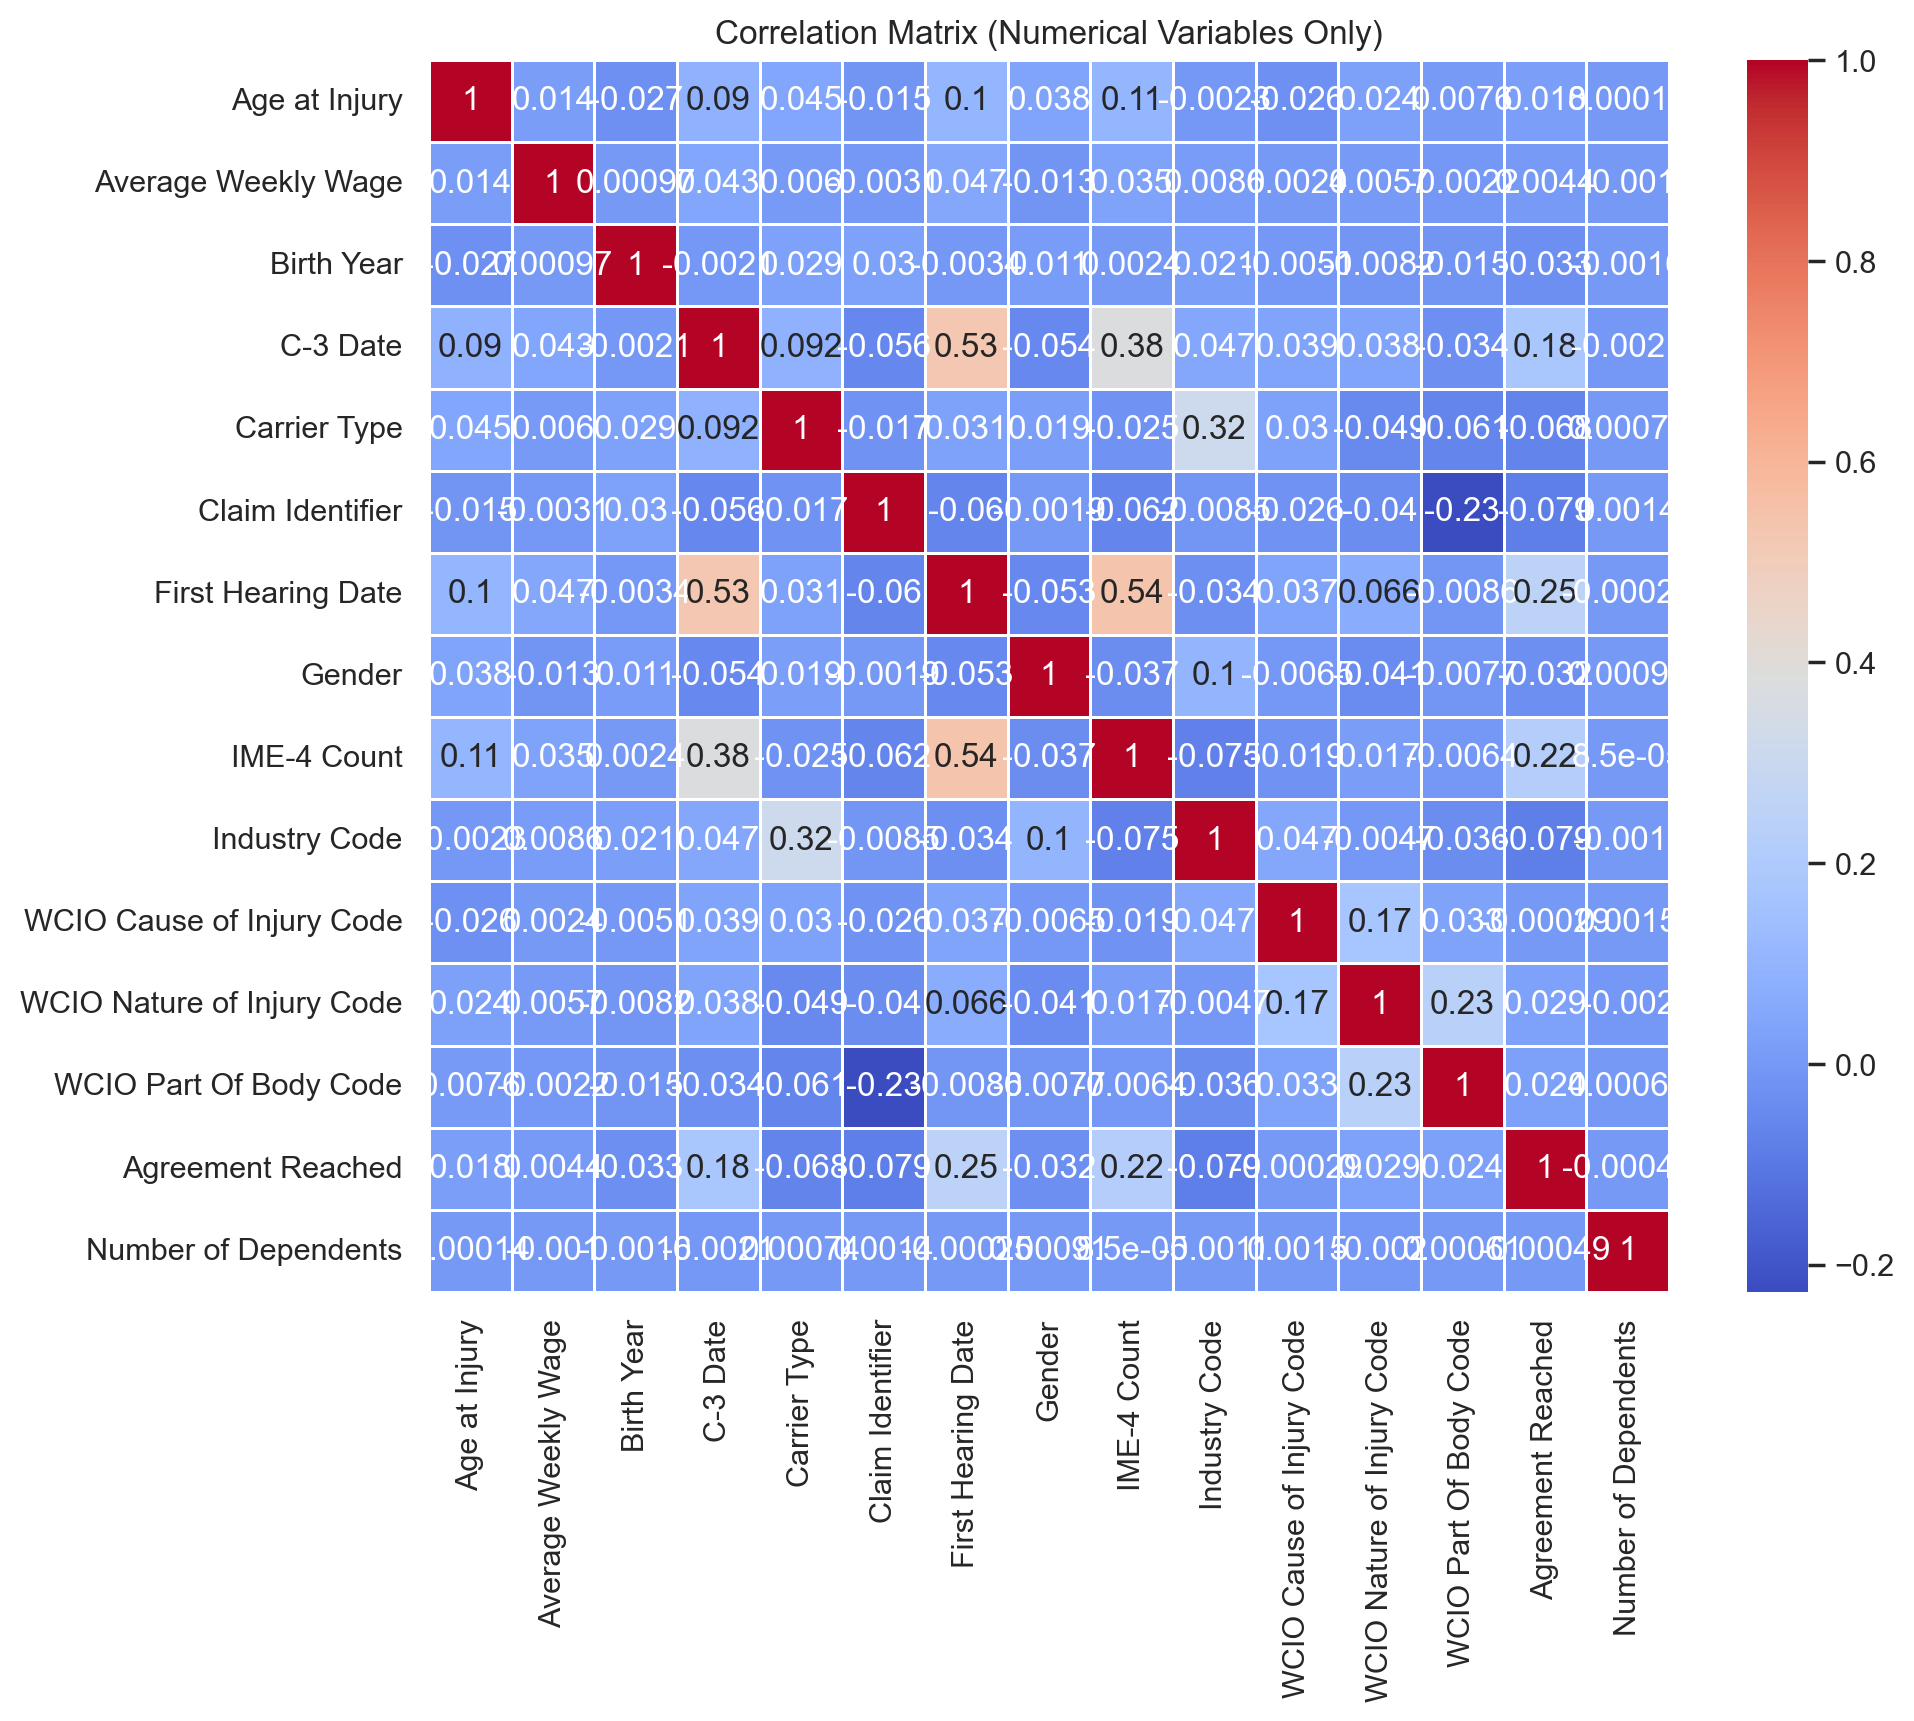

In [102]:
# Step 1: Select only numerical columns
numerical_df = X_train.select_dtypes(include='number')

# Step 2: Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Step 3: Visualize the correlation matrix
plt.figure(figsize=(10, 8))  # Optional: Adjusts the size of the plot
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Display the plot
plt.title('Correlation Matrix (Numerical Variables Only)')
plt.show()

In [103]:
'''import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Step 1: Select only categorical columns
categorical_df = wcb.select_dtypes(include=['object', 'datetime64[ns]'])

# Step 2: Define a function to calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Step 3: Create an empty DataFrame to store Cramér's V values
cramers_v_matrix = pd.DataFrame(np.zeros((categorical_df.shape[1], categorical_df.shape[1])), 
                                columns=categorical_df.columns, 
                                index=categorical_df.columns)

# Step 4: Calculate Cramér's V for each pair of categorical variables
for col1 in categorical_df.columns:
    for col2 in categorical_df.columns:
        if col1 != col2:
            cramers_v_matrix.loc[col1, col2] = cramers_v(categorical_df[col1], categorical_df[col2])
        else:
            cramers_v_matrix.loc[col1, col2] = 1  # Set diagonal to 1

# Step 5: Apply a mask for values below 0.4
mask = (cramers_v_matrix > -0.4) & (cramers_v_matrix < 0.4)

# Step 6: Visualize the correlation matrix with masking
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm', linewidths=0.5, mask=mask)

# Display the plot
plt.title('Cramér\'s V Correlation Matrix (Categorical Variables Only, Correlations ≥ 0.4)')
plt.show()

'''

"import pandas as pd\nimport numpy as np\nimport matplotlib.pyplot as plt\nimport seaborn as sns\nfrom scipy.stats import chi2_contingency\n\n# Step 1: Select only categorical columns\ncategorical_df = wcb.select_dtypes(include=['object', 'datetime64[ns]'])\n\n# Step 2: Define a function to calculate Cramér's V\ndef cramers_v(x, y):\n    confusion_matrix = pd.crosstab(x, y)\n    chi2 = chi2_contingency(confusion_matrix)[0]\n    n = confusion_matrix.sum().sum()\n    r, k = confusion_matrix.shape\n    return np.sqrt(chi2 / (n * (min(r, k) - 1)))\n\n# Step 3: Create an empty DataFrame to store Cramér's V values\ncramers_v_matrix = pd.DataFrame(np.zeros((categorical_df.shape[1], categorical_df.shape[1])), \n                                columns=categorical_df.columns, \n                                index=categorical_df.columns)\n\n# Step 4: Calculate Cramér's V for each pair of categorical variables\nfor col1 in categorical_df.columns:\n    for col2 in categorical_df.columns:\n       

## 2.3 Outliers <a name="23-outliers"></a>

In [105]:
print(X_train['Age at Injury'].quantile(0.995))
print(X_train['Age at Injury'].quantile(0.005))

X_train['Age at Injury'] = X_train.apply(lambda x: 16 if 16 >= x['Age at Injury'] else x['Age at Injury'], axis=1)
X_train['Age at Injury'] = X_train.apply(lambda x: 85 if 85 <= x['Age at Injury'] else x['Age at Injury'], axis=1)

75.0
16.0


In [106]:
X_train['Birth Year'] = X_train['Accident Date'].dt.year - X_train['Age at Injury']

In [107]:
'''box_plot_features = ['Age at Injury', 'Average Weekly Wage', 'Claim Injury Type', 'First Hearing Date', 'Accident Date', 'Assembly Date']


sns.set()
fig, axes = plt.subplots(2, ceil(len(box_plot_features) / 2), figsize=(40, 11))
for ax, feat in zip(axes.flatten(), box_plot_features):
    sns.boxplot(x=wcb[feat], ax=ax)

title = "Numeric Variables' Box Plots"
plt.suptitle(title)
plt.show()'''

'box_plot_features = [\'Age at Injury\', \'Average Weekly Wage\', \'Claim Injury Type\', \'First Hearing Date\', \'Accident Date\', \'Assembly Date\']\n\n\nsns.set()\nfig, axes = plt.subplots(2, ceil(len(box_plot_features) / 2), figsize=(40, 11))\nfor ax, feat in zip(axes.flatten(), box_plot_features):\n    sns.boxplot(x=wcb[feat], ax=ax)\n\ntitle = "Numeric Variables\' Box Plots"\nplt.suptitle(title)\nplt.show()'

# REVER

In [109]:
X_train.shape
y_train.shape

(444027,)

In [110]:
Q1 = X_train['Accident Date'].quantile(0.25)
Q3 = X_train['Accident Date'].quantile(0.75)
IQR = Q3 - Q1

# Define os limites de outliers usando um intervalo de tempo, também sem horas
lower_bound = pd.to_datetime((Q1 - pd.Timedelta(days=1.5 * IQR.days)).strftime('%Y-%m-%d'))

# Filtra as linhas de 'Accident Date' que estão dentro dos limites de outliers
X_train = X_train[(X_train['Accident Date'] >= lower_bound)]



# Garantir que y_train esteja sincronizado com X_train
y_train = y_train.loc[X_train.index]

In [111]:
X_train.shape
y_train.shape

(440401,)

In [112]:
X_train.describe(include='object').T

,count,unique,top,freq
Alternative Dispute Resolution,440401,2,N,440378
Attorney/Representative,440401,2,N,302602
Carrier Name,440401,1901,STATE INSURANCE FUND,86733
County of Injury,440401,63,SUFFOLK,46321
COVID-19 Indicator,440401,2,N,419335
District Name,440401,8,NYC,207441
Industry Code Description,440401,20,HEALTH CARE AND SOCIAL ASSISTANCE,89567
Medical Fee Region,440401,5,IV,203788
WCIO Cause of Injury Description,440401,74,LIFTING,36650
WCIO Nature of Injury Description,440401,56,STRAIN OR TEAR,120601


In [113]:
X_train['District Name'].value_counts()

District Name
NYC           207441
ALBANY         66678
HAUPPAUGE      46402
BUFFALO        35147
SYRACUSE       34555
ROCHESTER      30621
BINGHAMTON     17068
STATEWIDE       2489
Name: count, dtype: int64

In [114]:
X_train['Alternative Dispute Resolution'] = X_train['Alternative Dispute Resolution'].replace({'N': 0, 'Y': 1})

In [115]:
X_val['Alternative Dispute Resolution'] = X_val['Alternative Dispute Resolution'].replace({'N': 0, 'Y': 1})

In [116]:
X_train['Attorney/Representative'] = X_train['Attorney/Representative'].replace({'N': 0, 'Y': 1})

In [117]:
X_val['Attorney/Representative'] = X_val['Attorney/Representative'].replace({'N': 0, 'Y': 1})

In [118]:
y_train


65669         2. NON-COMP
489008       4. TEMPORARY
502078        2. NON-COMP
81536        4. TEMPORARY
453257        2. NON-COMP
               ...       
486338       4. TEMPORARY
121348       4. TEMPORARY
459105    5. PPD SCH LOSS
568426        3. MED ONLY
198794        3. MED ONLY
Name: Claim Injury Type, Length: 440401, dtype: object

In [119]:
X_train

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
65669,2020-04-06,57,0,2020-05-08,0,0.00,1963,2020-05-08,0,NEW YORK STATE MUNICIPAL,3,5479127,ORANGE,N,ALBANY,0,1,0,92,PUBLIC ADMINISTRATION,II,53,TWISTING,52,STRAIN OR TEAR,55,ANKLE,12549,0.0,Not Work Related,6
489008,2022-06-24,66,0,2022-07-01,1,1080.87,1956,2022-07-01,1,A I U INSURANCE COMPANY,1,6028412,KINGS,N,NYC,0,1,0,52,FINANCE AND INSURANCE,IV,25,FROM DIFFERENT LEVEL (ELEVATION),28,FRACTURE,36,FINGER(S),11226,0.0,Not Work Related,4
502078,2022-07-18,22,0,2022-07-26,0,0.00,2000,2022-07-26,0,OSSINING UNION FREE SCH DIST,3,6045944,WESTCHESTER,N,NYC,0,1,0,61,EDUCATIONAL SERVICES,III,74,"FELLOW WORKER, PATIENT OR OTHER PERSON",43,PUNCTURE,33,LOWER ARM,Unknown,0.0,Not Work Related,0
81536,2020-06-12,54,0,2020-06-16,1,1055.25,1966,2020-06-16,1,ARCH INDEMNITY INSURANCE CO.,1,5499954,SUFFOLK,N,HAUPPAUGE,0,1,1,62,HEALTH CARE AND SOCIAL ASSISTANCE,IV,79,OBJECT BEING LIFTED OR HANDLED,10,CONTUSION,38,SHOULDER(S),11746,0.0,Not Work Related,6
453257,2022-04-27,39,0,2022-05-03,0,0.00,1983,2022-05-03,0,MEMORIAL SLOAN KETTERING,4,5982088,KINGS,N,NYC,0,1,0,62,HEALTH CARE AND SOCIAL ASSISTANCE,IV,27,FROM LIQUID OR GREASE SPILLS,49,SPRAIN OR TEAR,55,ANKLE,11217,0.0,Not Work Related,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486338,2022-06-22,49,0,2022-06-28,1,837.00,1973,2022-06-28,1,STATE INSURANCE FUND,2,6023389,ONEIDA,N,SYRACUSE,0,0,3,81,OTHER SERVICES (EXCEPT PUBLIC ADMINISTRATION),II,60,"STRAIN OR INJURY BY, NOC",52,STRAIN OR TEAR,-9,MULTIPLE,13502,1.0,Not Work Related,2
121348,2020-08-07,26,0,2020-09-02,0,932.00,1994,2020-09-02,0,STATE INSURANCE FUND,2,5550900,SUFFOLK,N,HAUPPAUGE,0,0,0,56,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,III,26,FROM LADDER OR SCAFFOLDING,43,PUNCTURE,48,INTERNAL ORGANS,Unknown,0.0,Not Work Related,6
459105,2022-05-10,32,0,2022-05-12,1,832.58,1990,2022-05-12,0,STATE INSURANCE FUND,2,5989358,ST. LAWRENCE,N,SYRACUSE,0,0,2,62,HEALTH CARE AND SOCIAL ASSISTANCE,I,60,"STRAIN OR INJURY BY, NOC",52,STRAIN OR TEAR,38,SHOULDER(S),13652,0.0,Not Work Related,3
568426,2022-11-06,30,0,2022-11-14,0,0.00,1992,2022-11-12,0,SAFETY NATIONAL CASUALTY CORP,1,6132995,QUEENS,N,NYC,0,1,0,62,HEALTH CARE AND SOCIAL ASSISTANCE,IV,56,LIFTING,10,CONTUSION,-9,MULTIPLE,11413,0.0,Not Work Related,4


In [120]:
y_train = y_train.replace({
    '1. CANCELLED': 1, 
    '2. NON-COMP': 2, 
    '3. MED ONLY': 3, 
    '4. TEMPORARY': 4, 
    '5. PPD SCH LOSS': 5, 
    '6. PPD NSL': 6, 
    '7. PTD': 7, 
    '8. DEATH': 8
})



In [121]:
y_val = y_val.replace({
    '1. CANCELLED': 1, 
    '2. NON-COMP': 2, 
    '3. MED ONLY': 3, 
    '4. TEMPORARY': 4, 
    '5. PPD SCH LOSS': 5, 
    '6. PPD NSL': 6, 
    '7. PTD': 7, 
    '8. DEATH': 8
})



In [122]:
X_train['COVID-19 Indicator'] = X_train['COVID-19 Indicator'].replace({'N': 0, 'Y': 1})

In [123]:
X_val['COVID-19 Indicator'] = X_val['COVID-19 Indicator'].replace({'N': 0, 'Y': 1})

In [124]:
X_train['District Name'] = X_train['District Name'].replace({
    'NYC': 1,
    'ALBANY': 2,
    'HAUPPAUGE': 3,
    'BUFFALO': 4,
    'SYRACUSE': 5,
    'ROCHESTER': 6,
    'BINGHAMTON': 7,
    'STATEWIDE': 8
})

In [125]:
X_val['District Name'] = X_val['District Name'].replace({
    'NYC': 1,
    'ALBANY': 2,
    'HAUPPAUGE': 3,
    'BUFFALO': 4,
    'SYRACUSE': 5,
    'ROCHESTER': 6,
    'BINGHAMTON': 7,
    'STATEWIDE': 8
})

In [126]:
X_train['Medical Fee Region'] = X_train['Medical Fee Region'].replace({
    'I': 1,
    'II': 2,
    'III': 3,
    'IV': 4,
    'UK': 5
})


In [127]:
X_val['Medical Fee Region'] = X_val['Medical Fee Region'].replace({
    'I': 1,
    'II': 2,
    'III': 3,
    'IV': 4,
    'UK': 5
})


In [128]:
X_train[['Industry Code', 'Industry Code Description']].nunique()

X_train.drop_duplicates(subset=['Industry Code'])[['Industry Code', 'Industry Code Description']]

# Remove duplicatas com base no código e mantém apenas a primeira ocorrência de cada código
wcb_unicos = X_train.drop_duplicates(subset=['Industry Code'])[['Industry Code', 'Industry Code Description']]

# Conta a frequência de cada descrição na lista sem duplicatas de código
descricao_repetidas = wcb_unicos['Industry Code Description'].value_counts()

# Filtra para mostrar apenas as descrições que se repetem
descricao_repetidas[descricao_repetidas > 1]


# X_train[X_train['Industry Code Description'].isin(['MANUFACTURING', 'RETAIL TRADE', 'TRANSPORTATION AND WAREHOUSING'])][['Industry Code', 'Industry Code Description']]
X_train[X_train['Industry Code Description'].isin(['TRANSPORTATION AND WAREHOUSING'])][['Industry Code', 'Industry Code Description']]

X_train['Industry Code'] = X_train['Industry Code'].replace({45: 44, 32: 31, 33: 31, 49: 48})
X_val['Industry Code'] = X_val['Industry Code'].replace({45: 44, 32: 31, 33: 31, 49: 48})

In [129]:
X_train[['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description']].nunique()

X_train.drop_duplicates(subset=['WCIO Cause of Injury Code'])[['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description']]

# Remove duplicatas com base no código e mantém apenas a primeira ocorrência de cada código
wcb_unicos = X_train.drop_duplicates(subset=['WCIO Cause of Injury Code'])[['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description']]

# Conta a frequência de cada descrição na lista sem duplicatas de código
descricao_repetidas = wcb_unicos['WCIO Cause of Injury Description'].value_counts()

# Filtra para mostrar apenas as descrições que se repetem
descricao_repetidas[descricao_repetidas > 1]

#X_train[X_train['WCIO Cause of Injury Description'].isin(['OBJECT BEING LIFTED OR HANDLED', 'REPETITIVE MOTION'])][['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description']]

X_train[X_train['WCIO Cause of Injury Description'].isin(['OBJECT BEING LIFTED OR HANDLED'])][['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description']]

X_train['WCIO Cause of Injury Code'] = X_train['WCIO Cause of Injury Code'].replace({79: 17, 66: 17, 97: 94})
X_val['WCIO Cause of Injury Code'] = X_val['WCIO Cause of Injury Code'].replace({79: 17, 66: 17, 97: 94})

In [130]:
X_train['WCIO Part Of Body Code'] = X_train['WCIO Part Of Body Code'].replace({47: 23, 43: 22, 25: 18})
X_val['WCIO Part Of Body Code'] = X_val['WCIO Part Of Body Code'].replace({47: 23, 43: 22, 25: 18})

In [131]:
X_train['WCIO Part Of Body Code'] = X_train['WCIO Part Of Body Code'].replace(-9, 9)
X_val['WCIO Part Of Body Code'] = X_val['WCIO Part Of Body Code'].replace(-9, 9)

In [132]:
print(X_train.dtypes)

Accident Date                        datetime64[ns]
Age at Injury                                 int64
Alternative Dispute Resolution                int64
Assembly Date                        datetime64[ns]
Attorney/Representative                       int64
Average Weekly Wage                         float64
Birth Year                                    int64
C-2 Date                             datetime64[ns]
C-3 Date                                      int64
Carrier Name                                 object
Carrier Type                                  Int64
Claim Identifier                              int64
County of Injury                             object
COVID-19 Indicator                            int64
District Name                                 int64
First Hearing Date                            int64
Gender                                        Int64
IME-4 Count                                   Int64
Industry Code                                 Int64
Industry Cod

In [133]:
X_train = X_train.drop(columns=["Number of Dependents", "WCB Decision", "Industry Code Description", "WCIO Cause of Injury Description", "WCIO Nature of Injury Description", "WCIO Part Of Body Description"])

In [134]:
X_val = X_val.drop(columns=["Number of Dependents", "WCB Decision", "Industry Code Description", "WCIO Cause of Injury Description", "WCIO Nature of Injury Description", "WCIO Part Of Body Description"])

In [135]:
X_train['Carrier Name'].nunique()

1901

In [136]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
X_train["County of Injury"] = encoder.fit_transform(X_train[["County of Injury"]])
X_val["County of Injury"] = encoder.fit_transform(X_val[["County of Injury"]])


In [137]:
from sklearn.preprocessing import LabelEncoder


# Inicializando o LabelEncoder
label_encoder = LabelEncoder()

# Transformando a coluna 'Carrier Name'
X_train['Carrier Name'] = label_encoder.fit_transform(X_train['Carrier Name'])
X_val['Carrier Name'] = label_encoder.fit_transform(X_val['Carrier Name'])



In [138]:
X_train['Carrier Name'].unique()

array([1137,    1, 1256, ...,   76, 1460,  374])

In [139]:
print(X_train["Carrier Name"].dtype)


int32


In [140]:
print(wcb.dtypes)

Accident Date                          object
Age at Injury                         float64
Alternative Dispute Resolution         object
Assembly Date                          object
Attorney/Representative                object
Average Weekly Wage                   float64
Birth Year                            float64
C-2 Date                               object
C-3 Date                               object
Carrier Name                           object
Carrier Type                           object
Claim Identifier                        int64
Claim Injury Type                      object
County of Injury                       object
COVID-19 Indicator                     object
District Name                          object
First Hearing Date                     object
Gender                                 object
IME-4 Count                           float64
Industry Code                         float64
Industry Code Description              object
Medical Fee Region                

In [141]:
X_train['Agreement Reached']

65669     0.0
489008    0.0
502078    0.0
81536     0.0
453257    0.0
         ... 
486338    1.0
121348    0.0
459105    0.0
568426    0.0
198794    0.0
Name: Agreement Reached, Length: 440401, dtype: float64

In [142]:
# Listar as colunas que devem ser mantidas com tipos originais
cols_to_exclude = ['Accident Date', 'Assembly Date', 'C-2 Date', 'Zip Code', 'Average Weekly Wage']

# Converter todas as outras colunas para Int64
for col in X_train.columns:
    if col not in cols_to_exclude:
        X_train[col] = X_train[col].astype('Int64')

# Verificar os tipos de dados após a conversão
print(X_train.dtypes)


Accident Date                     datetime64[ns]
Age at Injury                              Int64
Alternative Dispute Resolution             Int64
Assembly Date                     datetime64[ns]
Attorney/Representative                    Int64
Average Weekly Wage                      float64
Birth Year                                 Int64
C-2 Date                          datetime64[ns]
C-3 Date                                   Int64
Carrier Name                               Int64
Carrier Type                               Int64
Claim Identifier                           Int64
County of Injury                           Int64
COVID-19 Indicator                         Int64
District Name                              Int64
First Hearing Date                         Int64
Gender                                     Int64
IME-4 Count                                Int64
Industry Code                              Int64
Medical Fee Region                         Int64
WCIO Cause of Injury

In [143]:
X_train = X_train.drop(columns=["Zip Code"])

In [144]:
X_val = X_val.drop(columns=["Zip Code"])

In [145]:
X_train['Accident Year'] = X_train['Accident Date'].dt.year
X_train['Accident Month'] = X_train['Accident Date'].dt.month

X_train['Assembly Year'] = X_train['Assembly Date'].dt.year
X_train['Assembly Month'] = X_train['Assembly Date'].dt.month

X_train['C-2 Year'] = X_train['C-2 Date'].dt.year
X_train['C-2 Month'] = X_train['C-2 Date'].dt.month


In [146]:
X_val['Accident Year'] = X_val['Accident Date'].dt.year
X_val['Accident Month'] = X_val['Accident Date'].dt.month

X_val['Assembly Year'] = X_val['Assembly Date'].dt.year
X_val['Assembly Month'] = X_val['Assembly Date'].dt.month

X_val['C-2 Year'] = X_val['C-2 Date'].dt.year
X_val['C-2 Month'] = X_val['C-2 Date'].dt.month

In [147]:
print(X_train.dtypes)

Accident Date                     datetime64[ns]
Age at Injury                              Int64
Alternative Dispute Resolution             Int64
Assembly Date                     datetime64[ns]
Attorney/Representative                    Int64
Average Weekly Wage                      float64
Birth Year                                 Int64
C-2 Date                          datetime64[ns]
C-3 Date                                   Int64
Carrier Name                               Int64
Carrier Type                               Int64
Claim Identifier                           Int64
County of Injury                           Int64
COVID-19 Indicator                         Int64
District Name                              Int64
First Hearing Date                         Int64
Gender                                     Int64
IME-4 Count                                Int64
Industry Code                              Int64
Medical Fee Region                         Int64
WCIO Cause of Injury

In [148]:
# Passo 1: Remover as colunas de data
X_train.drop(['Accident Date', 'Assembly Date', 'C-2 Date'], axis=1, inplace=True)

# Passo 2: Transformar as colunas de ano e mês para tipo Int64
X_train['Accident Year'] = X_train['Accident Year'].astype('Int64')
X_train['Accident Month'] = X_train['Accident Month'].astype('Int64')

X_train['Assembly Year'] = X_train['Assembly Year'].astype('Int64')
X_train['Assembly Month'] = X_train['Assembly Month'].astype('Int64')

X_train['C-2 Year'] = X_train['C-2 Year'].astype('Int64')
X_train['C-2 Month'] = X_train['C-2 Month'].astype('Int64')

# Verificar os tipos de dados após a transformação
print(X_train.dtypes)


Age at Injury                       Int64
Alternative Dispute Resolution      Int64
Attorney/Representative             Int64
Average Weekly Wage               float64
Birth Year                          Int64
C-3 Date                            Int64
Carrier Name                        Int64
Carrier Type                        Int64
Claim Identifier                    Int64
County of Injury                    Int64
COVID-19 Indicator                  Int64
District Name                       Int64
First Hearing Date                  Int64
Gender                              Int64
IME-4 Count                         Int64
Industry Code                       Int64
Medical Fee Region                  Int64
WCIO Cause of Injury Code           Int64
WCIO Nature of Injury Code          Int64
WCIO Part Of Body Code              Int64
Agreement Reached                   Int64
Accident Year                       Int64
Accident Month                      Int64
Assembly Year                     

In [149]:
# Passo 1: Remover as colunas de data
X_val.drop(['Accident Date', 'Assembly Date', 'C-2 Date'], axis=1, inplace=True)

# Passo 2: Transformar as colunas de ano e mês para tipo Int64
X_val['Accident Year'] = X_val['Accident Year'].astype('Int64')
X_val['Accident Month'] = X_val['Accident Month'].astype('Int64')

X_val['Assembly Year'] = X_val['Assembly Year'].astype('Int64')
X_val['Assembly Month'] = X_val['Assembly Month'].astype('Int64')

X_val['C-2 Year'] = X_val['C-2 Year'].astype('Int64')
X_val['C-2 Month'] = X_val['C-2 Month'].astype('Int64')

# Verificar os tipos de dados após a transformação
print(X_val.dtypes)


Age at Injury                       Int64
Alternative Dispute Resolution      int64
Attorney/Representative             int64
Average Weekly Wage               float64
Birth Year                          Int64
C-3 Date                            int64
Carrier Name                        int32
Carrier Type                       object
Claim Identifier                    int64
County of Injury                  float64
COVID-19 Indicator                  int64
District Name                       int64
First Hearing Date                  int64
Gender                              Int64
IME-4 Count                         Int64
Industry Code                       Int64
Medical Fee Region                  int64
WCIO Cause of Injury Code           Int64
WCIO Nature of Injury Code          Int64
WCIO Part Of Body Code              Int64
Agreement Reached                 float64
Accident Year                       Int64
Accident Month                      Int64
Assembly Year                     

In [150]:
print(X_train.nunique())

Age at Injury                         70
Alternative Dispute Resolution         2
Attorney/Representative                2
Average Weekly Wage               102469
Birth Year                            74
C-3 Date                               2
Carrier Name                        1901
Carrier Type                           6
Claim Identifier                  440401
County of Injury                      63
COVID-19 Indicator                     2
District Name                          8
First Hearing Date                     2
Gender                                 3
IME-4 Count                           42
Industry Code                         20
Medical Fee Region                     5
WCIO Cause of Injury Code             74
WCIO Nature of Injury Code            56
WCIO Part Of Body Code                54
Agreement Reached                      2
Accident Year                          6
Accident Month                        12
Assembly Year                          3
Assembly Month  

In [151]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder
scalers = {
    'minmax': MinMaxScaler(),
    'standard': StandardScaler(),
    'ordinal': OrdinalEncoder()
}

# Função para aplicar o scaler correto
def apply_scaling(X_train):
    for column in X_train.columns:
        num_unique_values = X_train[column].nunique()  # Número de valores únicos
        print(f'Coluna: {column}, Valores únicos: {num_unique_values}')

        # Definir a técnica de scaling com base no número de valores únicos
        if num_unique_values <= 10:  # Variáveis com poucos valores únicos (menor ou igual a 10)
            X_train[column] = scalers['ordinal'].fit_transform(X_train[[column]])
        else:  # Variáveis com muitos valores únicos
            # Pode usar MinMaxScaler ou StandardScaler dependendo do seu caso
            X_train[column] = scalers['minmax'].fit_transform(X_train[[column]])

    return X_train

# Aplicar o scaling ao seu DataFrame
X_train_scaled = apply_scaling(X_train)

# Ver as primeiras linhas para verificar se o scaling foi aplicado
print(X_train_scaled.head())


Coluna: Age at Injury, Valores únicos: 70
Coluna: Alternative Dispute Resolution, Valores únicos: 2
Coluna: Attorney/Representative, Valores únicos: 2
Coluna: Average Weekly Wage, Valores únicos: 102469
Coluna: Birth Year, Valores únicos: 74
Coluna: C-3 Date, Valores únicos: 2
Coluna: Carrier Name, Valores únicos: 1901
Coluna: Carrier Type, Valores únicos: 6
Coluna: Claim Identifier, Valores únicos: 440401
Coluna: County of Injury, Valores únicos: 63
Coluna: COVID-19 Indicator, Valores únicos: 2
Coluna: District Name, Valores únicos: 8
Coluna: First Hearing Date, Valores únicos: 2
Coluna: Gender, Valores únicos: 3
Coluna: IME-4 Count, Valores únicos: 42
Coluna: Industry Code, Valores únicos: 20
Coluna: Medical Fee Region, Valores únicos: 5
Coluna: WCIO Cause of Injury Code, Valores únicos: 74
Coluna: WCIO Nature of Injury Code, Valores únicos: 56
Coluna: WCIO Part Of Body Code, Valores únicos: 54
Coluna: Agreement Reached, Valores únicos: 2
Coluna: Accident Year, Valores únicos: 6
Colu

In [152]:
X_train.head()

,Age at Injury,Alternative Dispute Resolution,Attorney/Representative,Average Weekly Wage,Birth Year,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Medical Fee Region,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Agreement Reached,Accident Year,Accident Month,Assembly Year,Assembly Month,C-2 Year,C-2 Month
65669,0.594203,0.0,0.0,0.000000,0.410959,0.0,0.598421,3.0,0.111389,0.564516,0.0,1.0,0.0,1.0,0.000000,1.000000,1.0,0.530612,0.566667,0.511111,0.0,2.0,0.272727,0.0,0.363636,0.846154,0.363636
489008,0.724638,0.0,1.0,0.000382,0.315068,1.0,0.000526,1.0,0.822330,0.370968,0.0,0.0,0.0,1.0,0.000000,0.506173,3.0,0.244898,0.300000,0.300000,0.0,4.0,0.454545,2.0,0.545455,0.923077,0.545455
502078,0.086957,0.0,0.0,0.000000,0.917808,0.0,0.661053,3.0,0.845022,0.967742,0.0,0.0,0.0,1.0,0.000000,0.617284,2.0,0.744898,0.466667,0.266667,0.0,4.0,0.545455,2.0,0.545455,0.923077,0.545455
81536,0.550725,0.0,1.0,0.000373,0.452055,1.0,0.041579,1.0,0.138345,0.822581,0.0,2.0,0.0,1.0,0.013699,0.629630,3.0,0.163265,0.100000,0.322222,0.0,2.0,0.454545,0.0,0.454545,0.846154,0.454545
453257,0.333333,0.0,0.0,0.000000,0.684932,0.0,0.535789,4.0,0.762373,0.370968,0.0,0.0,0.0,1.0,0.000000,0.629630,3.0,0.265306,0.533333,0.511111,0.0,4.0,0.272727,2.0,0.363636,0.923077,0.363636


In [153]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def cor_heatmap(cor):
    # Criar uma cópia da matriz de correlação para aplicar a máscara
    cor_copy = cor.copy()
    
    # Aplicar a máscara: substituir valores menores que 0.5 por NaN (não exibir no heatmap)
    cor_copy[cor_copy < 0.5] = np.nan
    
    # Plotar o heatmap
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor_copy, annot=True, cmap=plt.cm.Reds, fmt='.1f', cbar=True)
    plt.show()

In [154]:
cor_spearman = X_train_scaled.corr(method ='spearman')
cor_spearman

,Age at Injury,Alternative Dispute Resolution,Attorney/Representative,Average Weekly Wage,Birth Year,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Medical Fee Region,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Agreement Reached,Accident Year,Accident Month,Assembly Year,Assembly Month,C-2 Year,C-2 Month
Age at Injury,1.000000,-0.000334,0.128229,0.125381,-0.998110,0.103444,-0.013285,0.057508,-0.017919,0.028067,0.003121,-0.012883,0.113979,0.036902,0.129620,0.001889,0.017474,-0.009615,0.040643,0.015432,0.024653,-0.019150,-0.020945,-0.013470,-0.015383,-0.015575,-0.013816
Alternative Dispute Resolution,-0.000334,1.000000,0.001900,-0.005433,-0.000006,0.003102,-0.001804,0.002379,-0.004290,0.003585,-0.001620,-0.002800,-0.002960,-0.005399,-0.001314,-0.004201,0.002139,0.000336,0.003722,-0.000696,-0.001558,-0.005890,0.000048,-0.004359,-0.000214,0.000270,0.001655
Attorney/Representative,0.128229,0.001900,1.000000,0.546727,-0.130562,0.698074,0.041574,0.095853,-0.036382,0.004832,-0.045490,-0.154506,0.680040,-0.089399,0.682932,0.026053,0.183626,0.043234,0.058722,-0.035253,0.287943,-0.045843,-0.007278,-0.035381,-0.005748,-0.003446,-0.008777
Average Weekly Wage,0.125381,-0.005433,0.546727,1.000000,-0.126287,0.443457,0.057296,0.084001,-0.038196,0.021220,-0.039452,-0.062468,0.495878,-0.095622,0.547996,0.045481,0.084923,0.003855,0.041029,0.007257,0.112824,-0.025949,-0.012959,-0.035369,-0.010987,-0.017787,-0.011976
Birth Year,-0.998110,-0.000006,-0.130562,-0.126287,1.000000,-0.106826,0.012136,-0.058563,0.072552,-0.027703,-0.007955,0.013073,-0.117617,-0.036653,-0.131245,-0.002763,-0.017849,0.007034,-0.042984,-0.025359,-0.029274,0.078521,0.015766,0.069417,0.021682,0.070712,0.020159
C-3 Date,0.103444,0.003102,0.698074,0.443457,-0.106826,1.000000,0.030891,0.104216,-0.055791,0.012047,-0.023831,-0.155023,0.530085,-0.055373,0.504824,0.033860,0.176575,0.043943,0.049412,-0.019221,0.200313,-0.062665,-0.012398,-0.053001,-0.013880,-0.020714,-0.015798
Carrier Name,-0.013285,-0.001804,0.041574,0.057296,0.012136,0.030891,1.000000,0.209054,-0.022055,-0.005949,-0.048007,0.041535,0.026935,-0.018686,0.040580,0.116218,-0.073699,-0.006990,-0.030241,-0.049466,0.014627,-0.019372,-0.003082,-0.022565,-0.001643,-0.022600,-0.000838
Carrier Type,0.057508,0.002379,0.095853,0.084001,-0.058563,0.104216,0.209054,1.000000,-0.020811,-0.017205,-0.007124,-0.015886,0.036965,0.014031,0.025048,0.316310,-0.013263,0.049166,-0.054384,-0.063697,-0.071253,-0.023030,-0.005881,-0.019483,-0.007124,-0.002754,-0.009002
Claim Identifier,-0.017919,-0.004290,-0.036382,-0.038196,0.072552,-0.055791,-0.022055,-0.020811,1.000000,0.003202,-0.072084,-0.007174,-0.060396,-0.002805,-0.039872,-0.013787,0.005615,-0.030439,-0.033242,-0.167684,-0.077991,0.924981,0.245868,0.941941,0.343514,0.932947,0.333425
County of Injury,0.028067,0.003585,0.004832,0.021220,-0.027703,0.012047,-0.005949,-0.017205,0.003202,1.000000,0.033224,-0.049140,0.000174,-0.011536,-0.001473,-0.007066,0.133135,-0.001210,0.009437,0.014298,0.000130,0.003618,0.001412,0.002320,0.003916,0.002237,0.004170


In [155]:
cor_pearson = X_train_scaled.corr(method ='pearson')
cor_pearson

,Age at Injury,Alternative Dispute Resolution,Attorney/Representative,Average Weekly Wage,Birth Year,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Medical Fee Region,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Agreement Reached,Accident Year,Accident Month,Assembly Year,Assembly Month,C-2 Year,C-2 Month
Age at Injury,1.000000,-0.000528,0.122592,0.013434,-0.998058,0.098564,-0.015056,0.046102,-0.016228,0.029269,0.002830,-0.013408,0.110038,0.036792,0.106838,-0.002938,0.017926,-0.014432,0.027285,0.016054,0.024469,-0.018426,-0.021014,-0.011867,-0.015180,-0.014491,-0.013669
Alternative Dispute Resolution,-0.000528,1.000000,0.001900,-0.000522,0.000155,0.003102,-0.000810,0.003830,-0.004287,0.003553,-0.001620,-0.002701,-0.002960,-0.005398,-0.001720,-0.005595,0.002384,0.000519,0.003743,0.000061,-0.001558,-0.005965,0.000052,-0.004379,-0.000210,0.000863,0.001637
Attorney/Representative,0.122592,0.001900,1.000000,0.053007,-0.125205,0.698074,0.049432,0.083255,-0.036331,0.006881,-0.045490,-0.139820,0.680040,-0.089242,0.522963,0.039995,0.184952,0.049339,0.040554,-0.028698,0.287943,-0.048018,-0.007337,-0.035239,-0.005685,-0.000893,-0.008801
Average Weekly Wage,0.013434,-0.000522,0.053007,1.000000,-0.013528,0.043316,0.002491,0.005913,-0.003195,0.005560,0.000806,-0.008540,0.046459,-0.013154,0.034477,0.008462,0.011085,0.003455,0.005718,-0.000749,0.005751,-0.002178,-0.000759,-0.003359,0.000487,-0.001429,0.000795
Birth Year,-0.998058,0.000155,-0.125205,-0.013528,1.000000,-0.102256,0.013509,-0.047213,0.073195,-0.028907,-0.007833,0.013638,-0.113999,-0.036473,-0.109831,0.002310,-0.018350,0.011554,-0.030406,-0.027514,-0.029386,0.080674,0.015716,0.070211,0.021760,0.071224,0.020243
C-3 Date,0.098564,0.003102,0.698074,0.043316,-0.102256,1.000000,0.037402,0.091594,-0.055732,0.014018,-0.023831,-0.139282,0.530085,-0.055221,0.381710,0.045525,0.178362,0.048684,0.037796,-0.013348,0.200313,-0.064155,-0.012509,-0.052825,-0.013821,-0.017524,-0.015830
Carrier Name,-0.015056,-0.000810,0.049432,0.002491,0.013509,0.037402,1.000000,0.155709,-0.026353,-0.008102,-0.047082,0.026955,0.031060,-0.020164,0.021857,0.094534,-0.060229,-0.004537,-0.042900,-0.059774,0.010262,-0.024078,-0.002037,-0.026848,-0.002180,-0.024905,-0.001416
Carrier Type,0.046102,0.003830,0.083255,0.005913,-0.047213,0.091594,0.155709,1.000000,-0.017706,-0.017525,-0.008174,0.001219,0.030178,0.017469,-0.025656,0.313998,-0.011732,0.043384,-0.049324,-0.042658,-0.066322,-0.020130,-0.003771,-0.016610,-0.005308,0.001164,-0.007412
Claim Identifier,-0.016228,-0.004287,-0.036331,-0.003195,0.073195,-0.055732,-0.026353,-0.017706,1.000000,0.003008,-0.071919,-0.005475,-0.060339,-0.002691,-0.062425,-0.008926,0.006242,-0.028690,-0.039805,-0.186326,-0.077971,0.915122,0.246661,0.941631,0.343853,0.920430,0.333621
County of Injury,0.029269,0.003553,0.006881,0.005560,-0.028907,0.014018,-0.008102,-0.017525,0.003008,1.000000,0.033824,-0.091202,0.001308,-0.010001,-0.000074,0.001101,0.169151,-0.000228,0.014585,0.016388,-0.000210,0.004359,0.001251,0.002339,0.003784,0.002561,0.004083


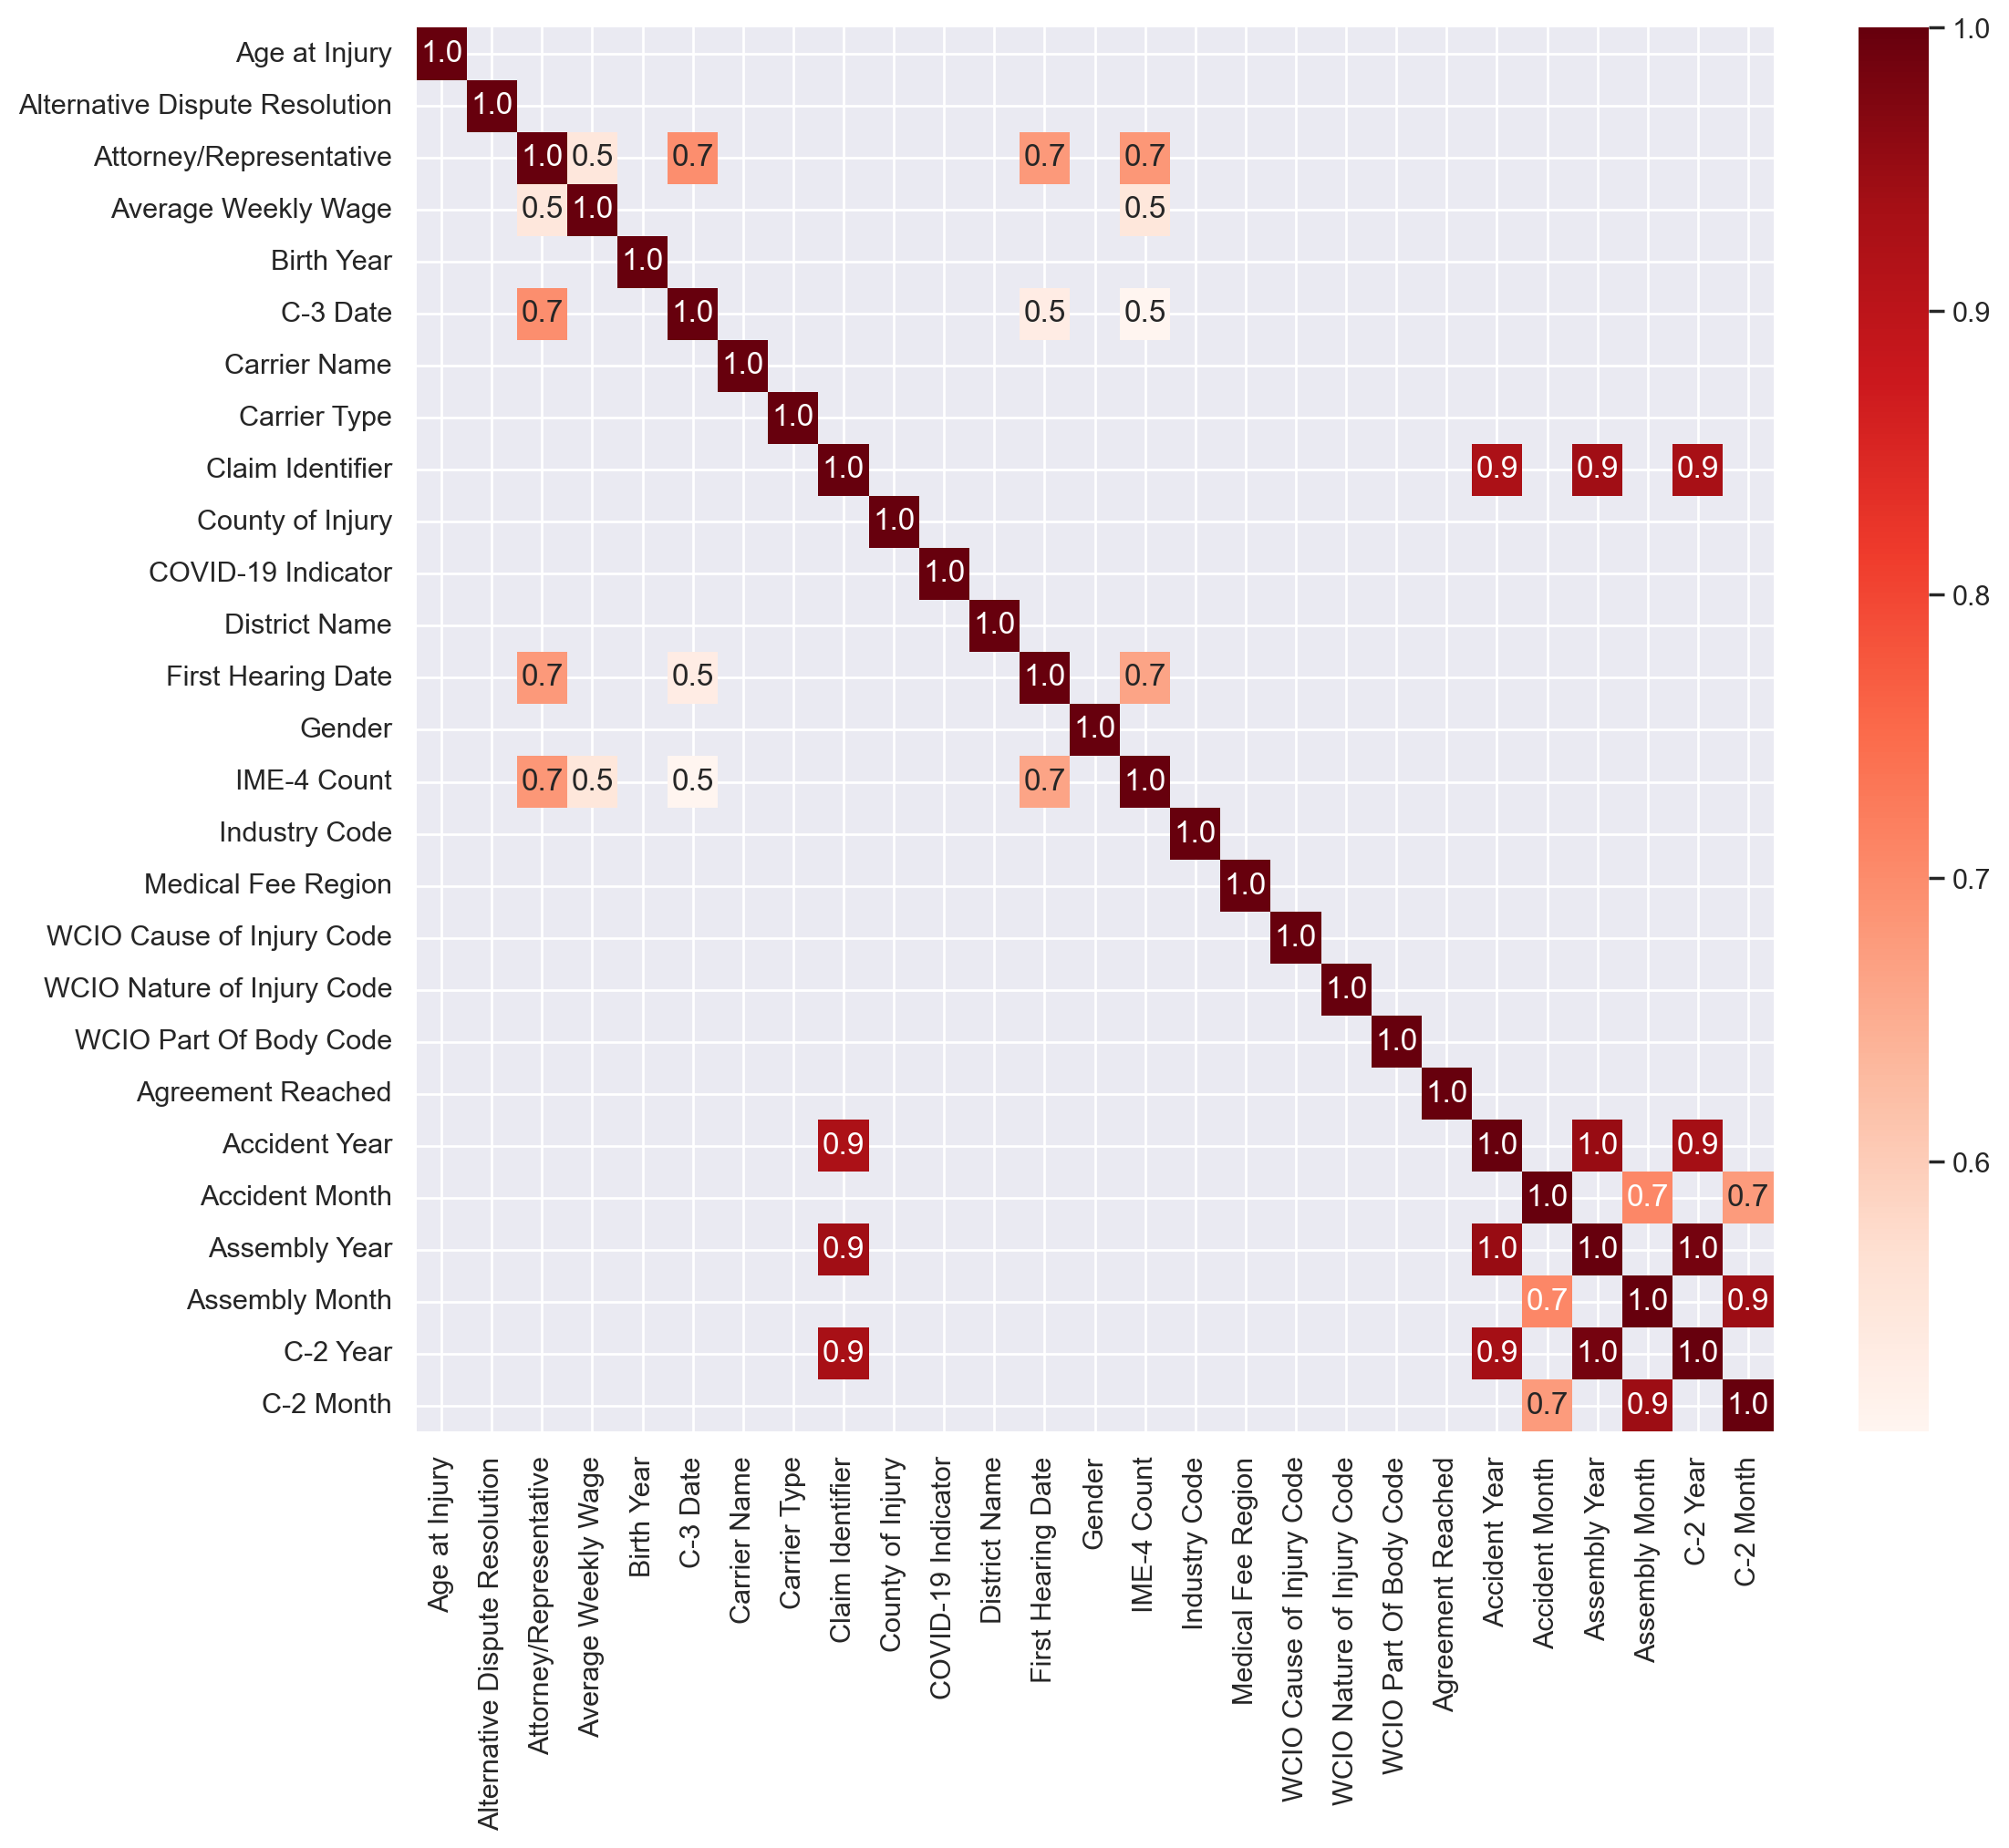

In [156]:
cor_heatmap(cor_spearman)

In [157]:
X_val_scaled = apply_scaling(X_val)

# Ver as primeiras linhas para verificar se o scaling foi aplicado
print(X_val_scaled.head())

Coluna: Age at Injury, Valores únicos: 94
Coluna: Alternative Dispute Resolution, Valores únicos: 2
Coluna: Attorney/Representative, Valores únicos: 2
Coluna: Average Weekly Wage, Valores únicos: 32607
Coluna: Birth Year, Valores únicos: 98
Coluna: C-3 Date, Valores únicos: 2
Coluna: Carrier Name, Valores únicos: 1621
Coluna: Carrier Type, Valores únicos: 7
Coluna: Claim Identifier, Valores únicos: 110989
Coluna: County of Injury, Valores únicos: 63
Coluna: COVID-19 Indicator, Valores únicos: 2
Coluna: District Name, Valores únicos: 8
Coluna: First Hearing Date, Valores únicos: 2
Coluna: Gender, Valores únicos: 3
Coluna: IME-4 Count, Valores únicos: 34
Coluna: Industry Code, Valores únicos: 20
Coluna: Medical Fee Region, Valores únicos: 5
Coluna: WCIO Cause of Injury Code, Valores únicos: 74
Coluna: WCIO Nature of Injury Code, Valores únicos: 55
Coluna: WCIO Part Of Body Code, Valores únicos: 54
Coluna: Agreement Reached, Valores únicos: 2
Coluna: Accident Year, Valores únicos: 43
Colu

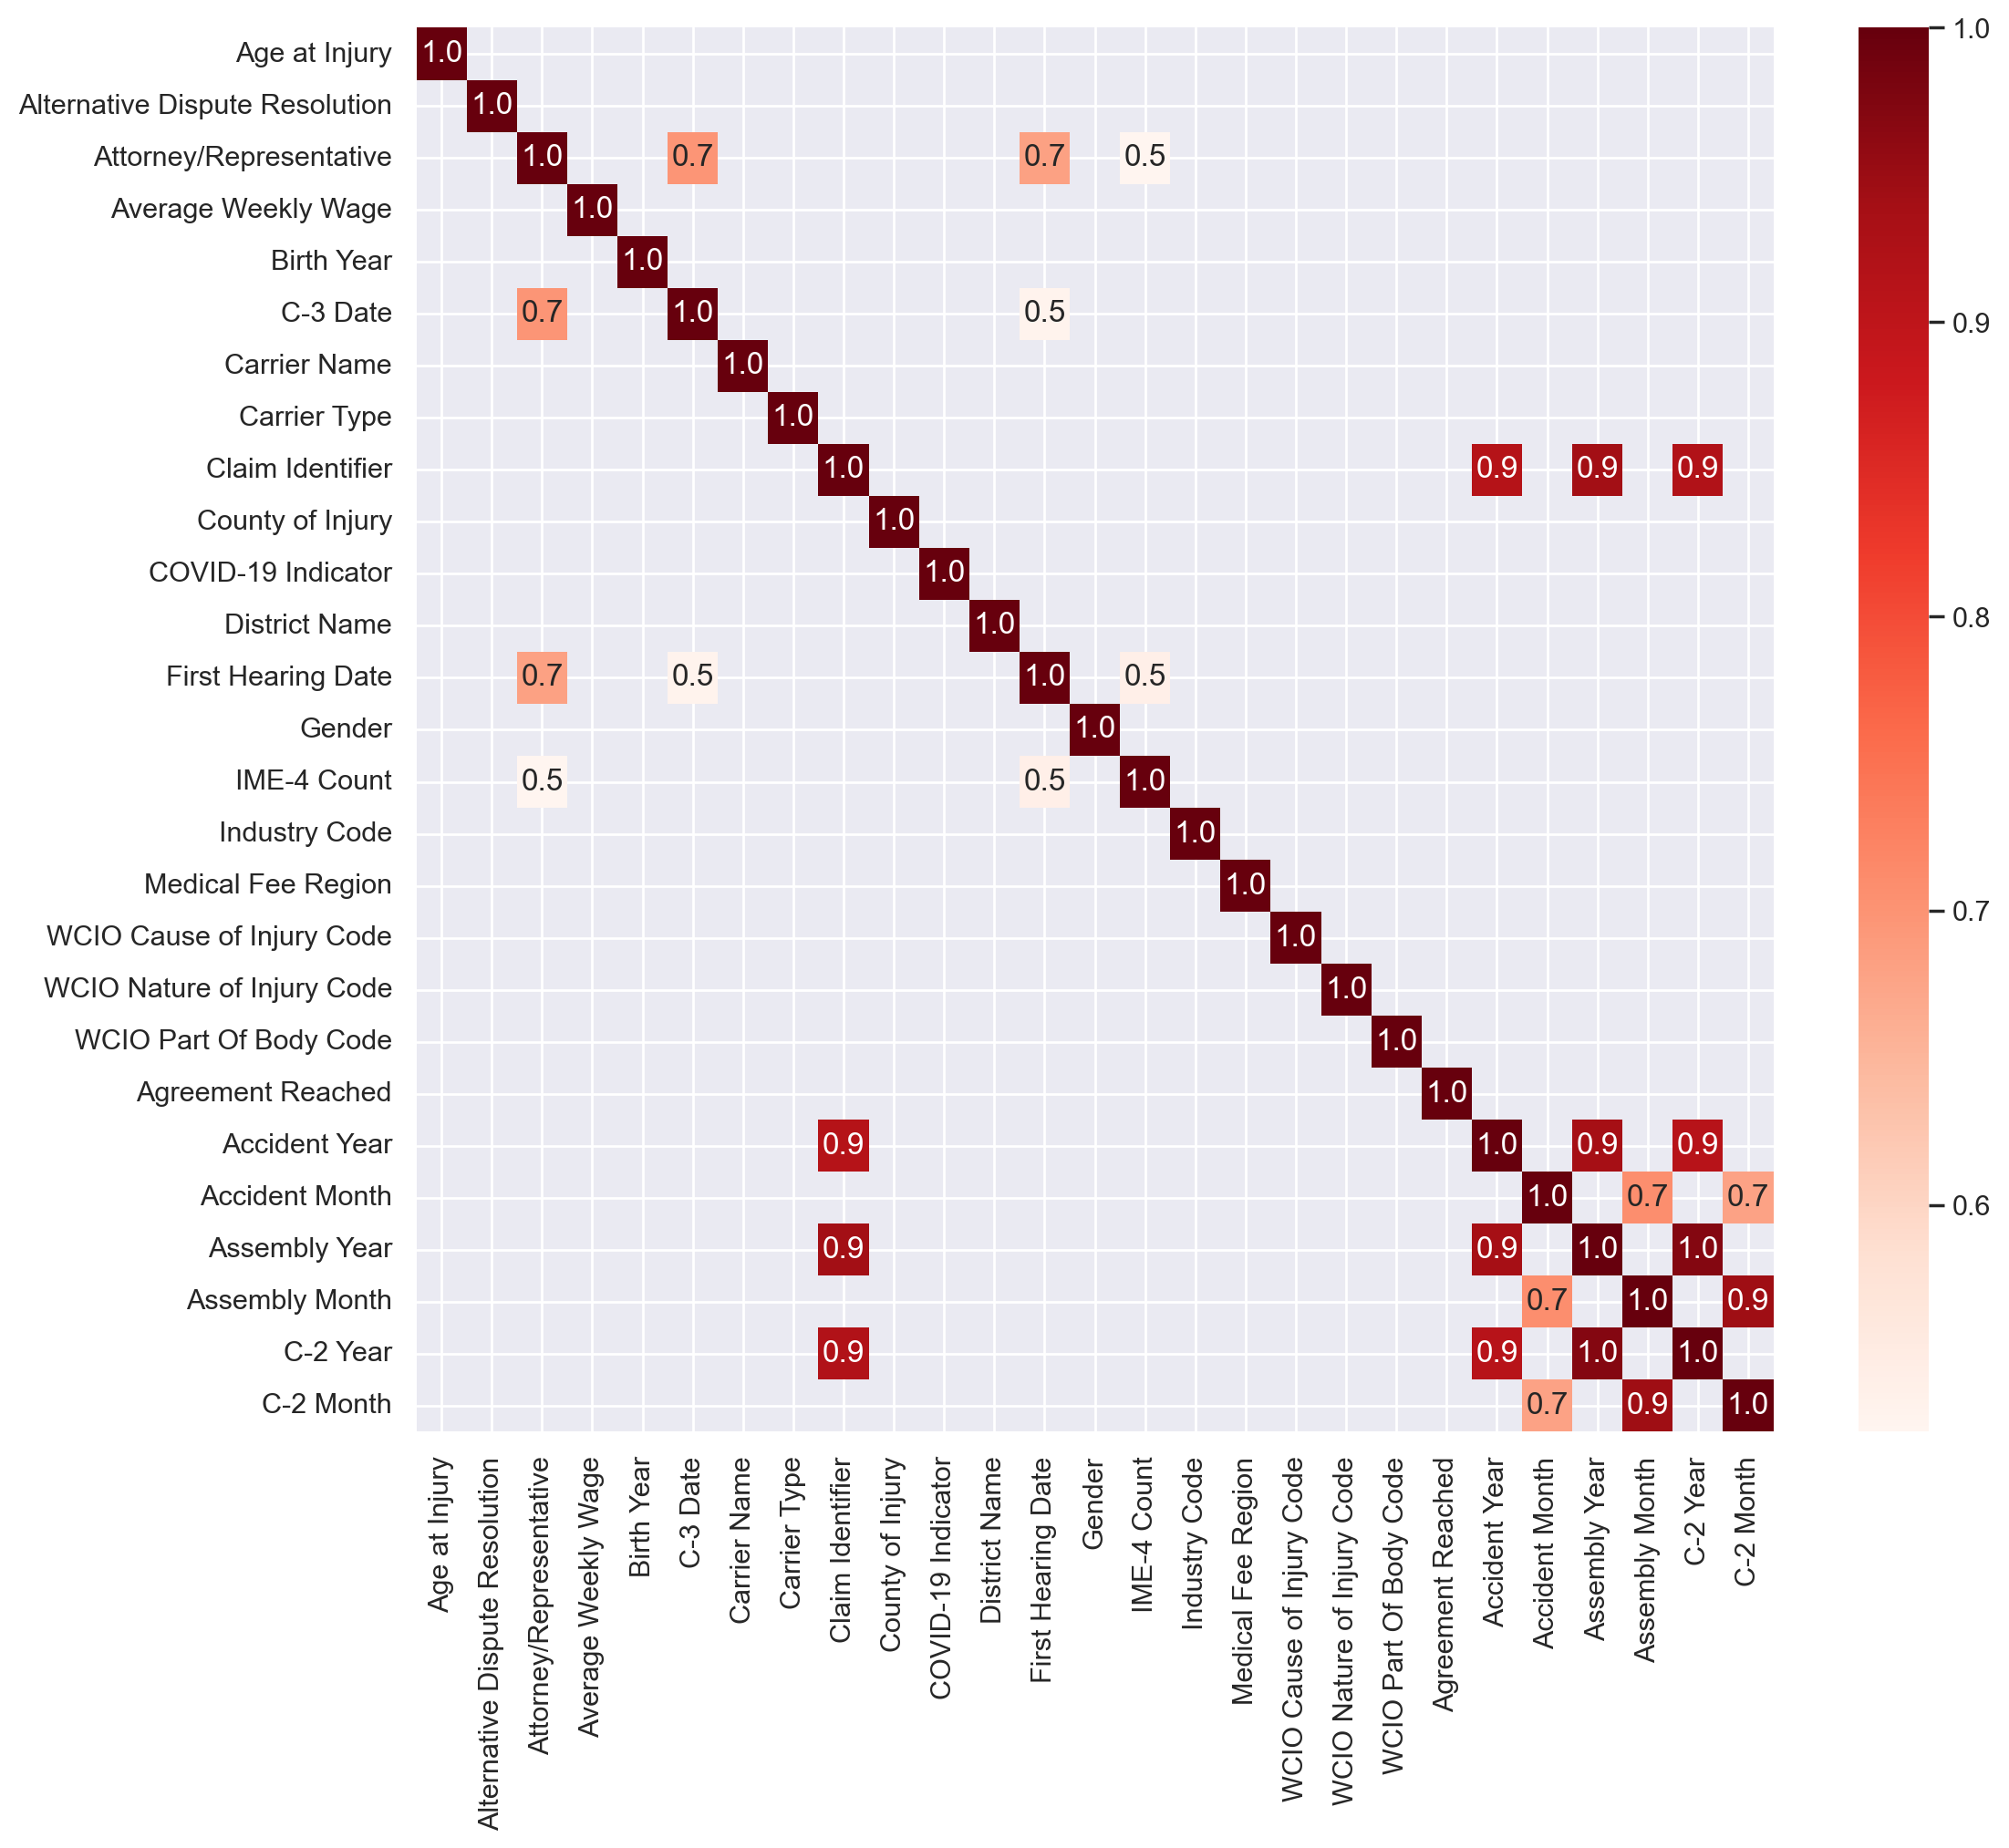

In [158]:
cor_heatmap(cor_pearson)

In [159]:
model = LogisticRegression()

In [160]:
#rfe = RFE(estimator = model, n_features_to_select = 3)

In [161]:
#X_rfe = rfe.fit_transform(X = X_train_scaled, y = y_train)

In [162]:
#X_rfe

In [163]:
#rfe.support_

In [164]:
#rfe.ranking_

In [165]:
#selected_features = pd.Series(rfe.support_, index = X_train_scaled.columns)
#selected_features

In [166]:
X_val.isna().sum()

Age at Injury                     0
Alternative Dispute Resolution    0
Attorney/Representative           0
Average Weekly Wage               0
Birth Year                        0
C-3 Date                          0
Carrier Name                      0
Carrier Type                      0
Claim Identifier                  0
County of Injury                  0
COVID-19 Indicator                0
District Name                     0
First Hearing Date                0
Gender                            0
IME-4 Count                       0
Industry Code                     0
Medical Fee Region                0
WCIO Cause of Injury Code         0
WCIO Nature of Injury Code        0
WCIO Part Of Body Code            0
Agreement Reached                 0
Accident Year                     0
Accident Month                    0
Assembly Year                     0
Assembly Month                    0
C-2 Year                          0
C-2 Month                         0
dtype: int64

In [167]:
'''#no of features
nof_list=np.arange(1,8)            
high_score=0
#Variable to store the optimum features
nof=0           
train_score_list =[]
val_score_list = []

for n in range(len(nof_list)):
    model = LogisticRegression()
    
    rfe = RFE(estimator = model,n_features_to_select = nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_scaled,y_train)
    X_val_rfe = rfe.transform(X_val_scaled)
    model.fit(X_train_rfe,y_train)
    
    #storing results on training data
    train_score = model.score(X_train_rfe,y_train)
    train_score_list.append(train_score)
    
    #storing results on training data
    val_score = model.score(X_val_rfe,y_val)
    val_score_list.append(val_score)
    
    #check best score
    if(val_score >= high_score):
        high_score = val_score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))'''

'#no of features\nnof_list=np.arange(1,8)            \nhigh_score=0\n#Variable to store the optimum features\nnof=0           \ntrain_score_list =[]\nval_score_list = []\n\nfor n in range(len(nof_list)):\n    model = LogisticRegression()\n    \n    rfe = RFE(estimator = model,n_features_to_select = nof_list[n])\n    X_train_rfe = rfe.fit_transform(X_train_scaled,y_train)\n    X_val_rfe = rfe.transform(X_val_scaled)\n    model.fit(X_train_rfe,y_train)\n    \n    #storing results on training data\n    train_score = model.score(X_train_rfe,y_train)\n    train_score_list.append(train_score)\n    \n    #storing results on training data\n    val_score = model.score(X_val_rfe,y_val)\n    val_score_list.append(val_score)\n    \n    #check best score\n    if(val_score >= high_score):\n        high_score = val_score\n        nof = nof_list[n]\nprint("Optimum number of features: %d" %nof)\nprint("Score with %d features: %f" % (nof, high_score))'

In [168]:
'''plt.plot(list(range(1,8)), train_score_list, label="Score on Training Set", color='yellowgreen')
plt.plot(list(range(1,8)), val_score_list, label="Score on Test Set", color='dimgray')
plt.xlabel("Maximum Depth")
plt.ylabel("Score")
plt.legend()
plt.show()'''

'plt.plot(list(range(1,8)), train_score_list, label="Score on Training Set", color=\'yellowgreen\')\nplt.plot(list(range(1,8)), val_score_list, label="Score on Test Set", color=\'dimgray\')\nplt.xlabel("Maximum Depth")\nplt.ylabel("Score")\nplt.legend()\nplt.show()'

In [169]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Importância das variáveis
feature_importance = model.feature_importances_

# Selecionar as variáveis mais importantes
important_features = [X_train.columns[i] for i in range(len(feature_importance)) if feature_importance[i] > 0.05]  # exemplo de limiar


In [324]:
important_features

['Attorney/Representative',
 'Average Weekly Wage',
 'Claim Identifier',
 'IME-4 Count']

In [170]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [171]:
reg = LassoCV()

In [172]:
reg.fit(X_train_scaled, y_train)

LassoCV()

In [173]:
coef = pd.Series(reg.coef_, index = X_train_scaled.columns)
coef

Age at Injury                     0.194488
Alternative Dispute Resolution   -0.000000
Attorney/Representative           0.924192
Average Weekly Wage               0.000000
Birth Year                       -0.000000
C-3 Date                          0.205165
Carrier Name                      0.079086
Carrier Type                     -0.005492
Claim Identifier                 -1.032257
County of Injury                  0.051785
COVID-19 Indicator               -0.159669
District Name                     0.018859
First Hearing Date                0.436313
Gender                           -0.083654
IME-4 Count                       3.851171
Industry Code                     0.203812
Medical Fee Region               -0.032179
WCIO Cause of Injury Code        -0.124784
WCIO Nature of Injury Code       -0.032426
WCIO Part Of Body Code            0.052681
Agreement Reached                 0.105434
Accident Year                     0.302876
Accident Month                    0.252973
Assembly Ye

In [174]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 21 variables and eliminated the other 6 variables


In [175]:
coef.sort_values()

Claim Identifier                 -1.032257
COVID-19 Indicator               -0.159669
WCIO Cause of Injury Code        -0.124784
Gender                           -0.083654
WCIO Nature of Injury Code       -0.032426
Medical Fee Region               -0.032179
Carrier Type                     -0.005492
Assembly Year                    -0.003208
Assembly Month                   -0.000000
C-2 Year                          0.000000
C-2 Month                         0.000000
Birth Year                       -0.000000
Average Weekly Wage               0.000000
Alternative Dispute Resolution   -0.000000
District Name                     0.018859
County of Injury                  0.051785
WCIO Part Of Body Code            0.052681
Carrier Name                      0.079086
Agreement Reached                 0.105434
Age at Injury                     0.194488
Industry Code                     0.203812
C-3 Date                          0.205165
Accident Month                    0.252973
Accident Ye

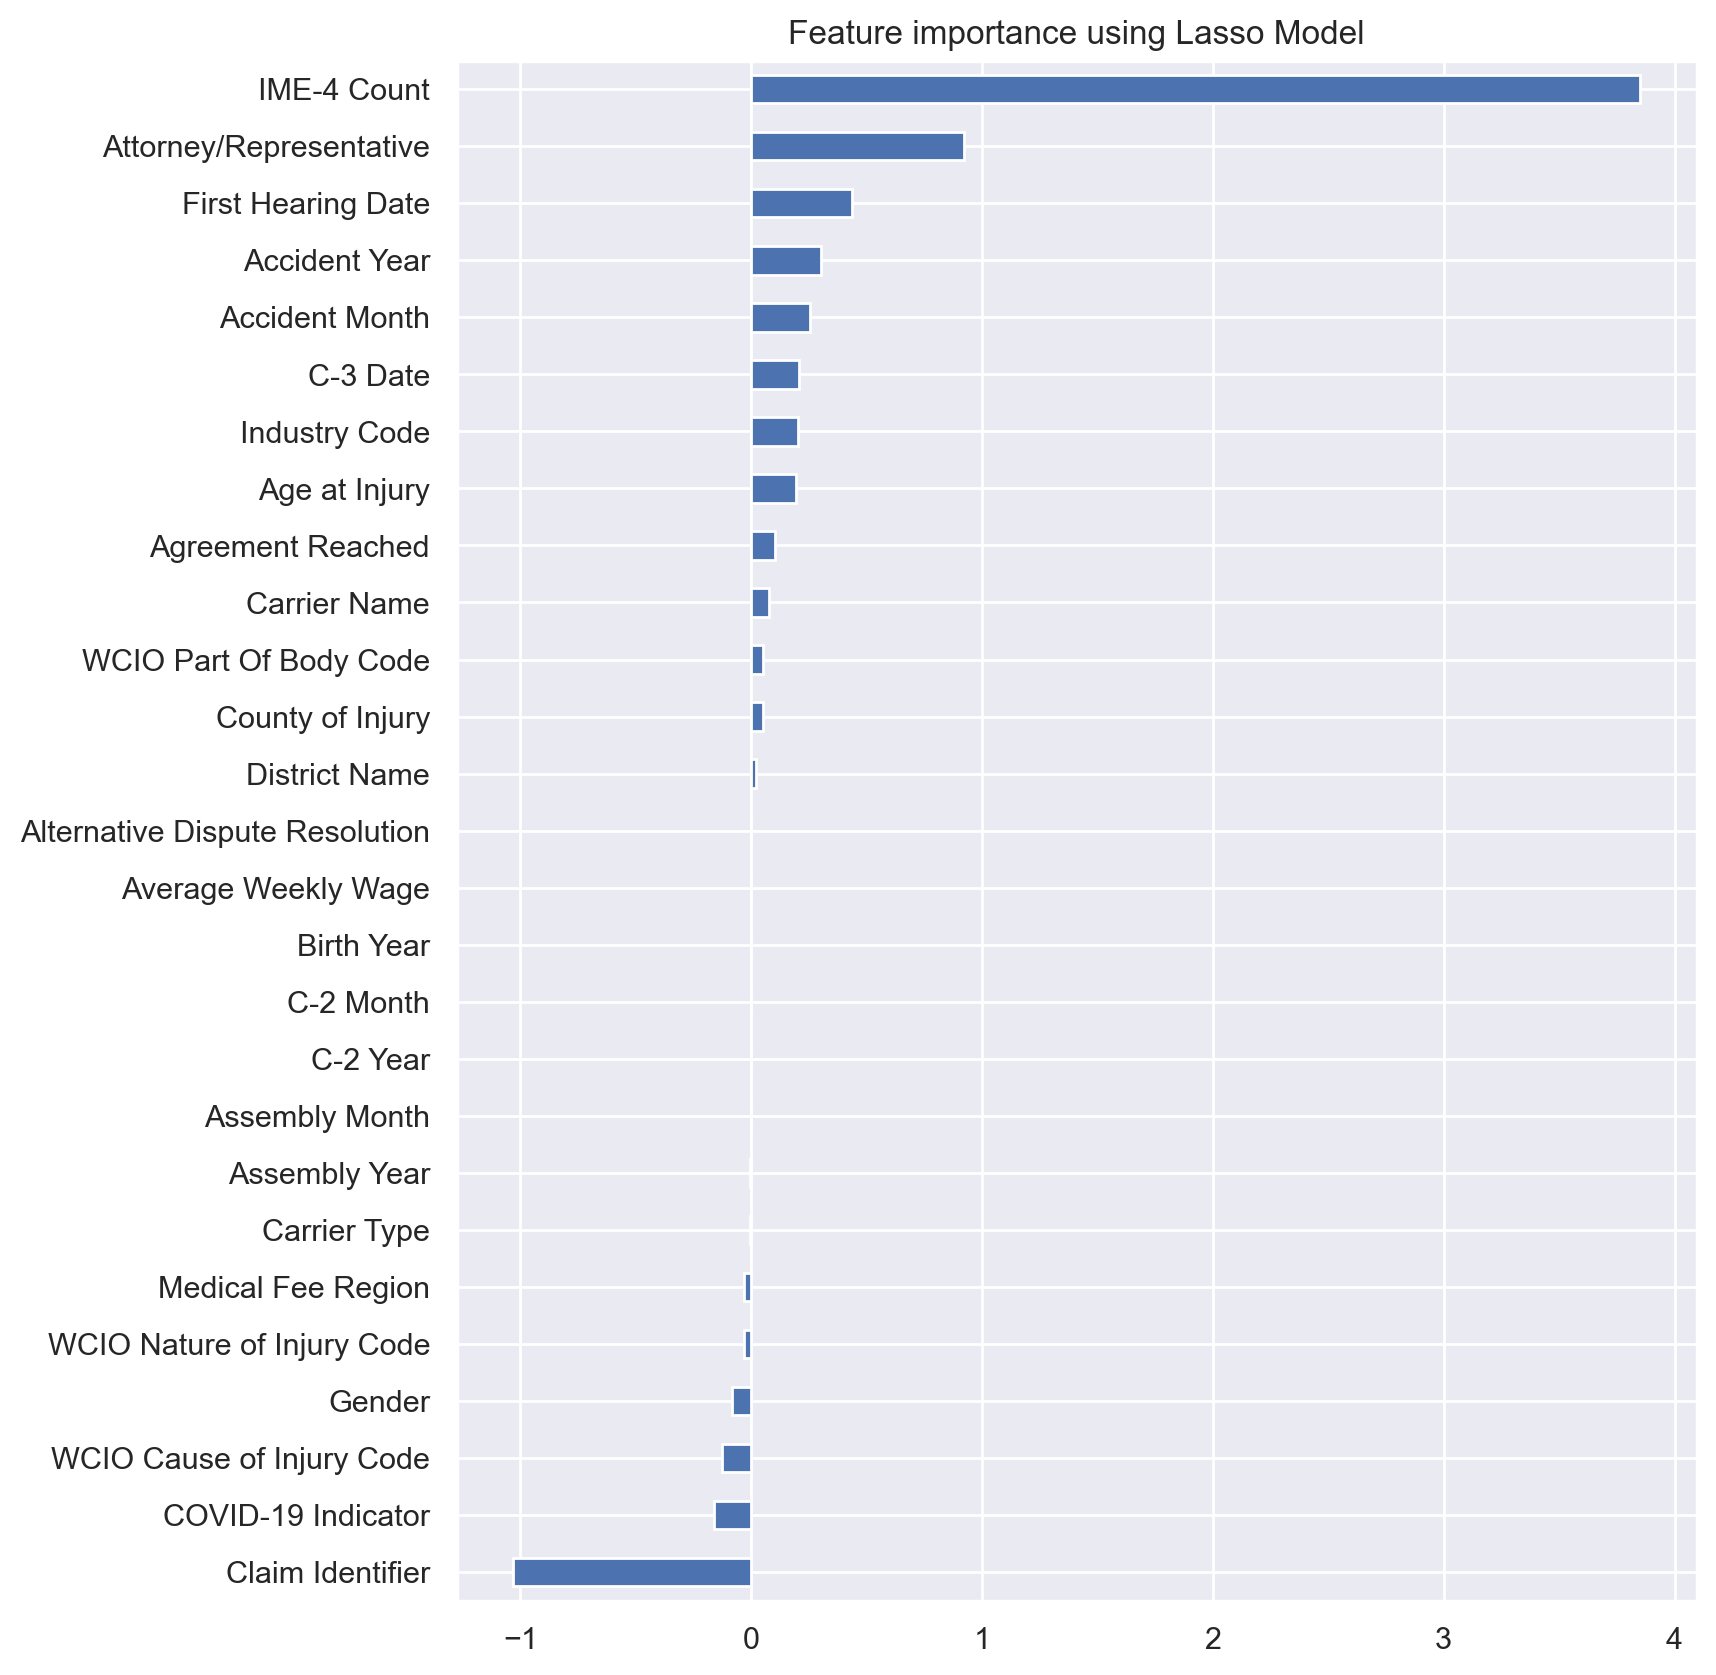

In [176]:
plot_importance(coef,'Lasso')

In [326]:
modelKNN = KNeighborsClassifier()

In [328]:
modelKNN.fit(X = X_train, y = y_train)

KNeighborsClassifier()

In [330]:
labels_train = modelKNN.predict(X_train)
labels_val = modelKNN.predict(X_val)
labels_train

array([2, 4, 2, ..., 4, 2, 2], dtype=int64)

In [331]:
modelKNN.predict_proba(X_val)

array([[0. , 1. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0.2, ..., 0. , 0. , 0. ],
       [0. , 0.8, 0. , ..., 0. , 0. , 0. ],
       ...,
       [0.2, 0.4, 0.2, ..., 0. , 0. , 0. ],
       [0. , 1. , 0. , ..., 0. , 0. , 0. ],
       [0. , 1. , 0. , ..., 0. , 0. , 0. ]])

In [332]:
print(modelKNN.score(X_train, y_train))

0.717511994750239


In [334]:
print(modelKNN.score(X_val, y_val))

0.5605690654028778
